# Proyecto de Curso – Ingeniería de Características – Fase 1.

**Catedrático:** Ing. Preng Biba Solares  

**Auxiliar:** Ing. Jorge Alberto Osoy Barrera

**Curso:** Statics Learning

**Alumnos participantes:** Jordi Gian Carlo Chajón López (Carnet 23000477) y Felipe Carlos Escoto Castro (Carnet 23003984).

In [174]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [175]:
dataset =pd.read_csv("global-data-on-sustainable-energy.csv")
dataset.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                             NaN   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       NaN         NaN             NaN   
1                                       NaN         NaN             NaN   
2                                       NaN         NaN      179.426579   
3                                       NaN    8.832278      190.683814   
4                                       NaN    1.414118      211.382074   

   Density (P/Km2) Land Area(Km2)  Latitude  Longitude  
0               60         652230  33.93911  67.709953  
1            

### Ánalisis Exploratorio Dataset Original

In [370]:
# Mostrar información sobre el dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3648 entries, 0 to 3647
Data columns (total 21 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   Entity                                                            3648 non-null   object 
 1   Year                                                              3648 non-null   int64  
 2   Access to electricity (% of population)                           3648 non-null   float64
 3   Access to clean fuels for cooking                                 3648 non-null   float64
 4   Renewable-electricity-generating-capacity-per-capita              3648 non-null   float64
 5   Financial flows to developing countries (US $)                    3648 non-null   float64
 6   Renewable energy share in the total final energy consumption (%)  3648 non-null   float64
 7   Electricity from fossil fuels (TW

In [371]:
# Describir estadísticamente el dataset
print(dataset.describe())

              Year  Access to electricity (% of population)  \
count  3648.000000                              3648.000000   
mean   2010.041118                                78.933693   
std       6.052776                                30.238162   
min    2000.000000                                 1.252269   
25%    2005.000000                                59.916941   
50%    2010.000000                                98.272340   
75%    2015.000000                               100.000000   
max    2020.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3648.000000   
mean                           63.255504   
std                            38.133777   
min                             0.000000   
25%                            25.862500   
50%                            78.875000   
75%                           100.000000   
max                           100.000000   

       Renewable-electricity-genera

### 1. Determine que columnas poseen faltantes (NA o Nulos)

In [176]:
col_con_nan = []

for col in dataset.columns:
    porcentaje_faltante = dataset[col].isnull().mean()
    if(porcentaje_faltante > 0):
        col_con_nan.append(col)
col_con_nan

['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita']

### 2. Se determino la proporción de faltantes para cada columna con faltantes y se muestra en un gráfico de barras con el porcentaje de faltantes para cada columna. 

In [177]:
porcentaje_nulos = dataset[col_con_nan].isnull().mean()
porcentaje_nulos_redondeado = round(porcentaje_nulos * 100, 2)
porcentaje_nulos_redondeado

Access to electricity (% of population)                              0.25
Access to clean fuels for cooking                                    4.61
Renewable-electricity-generating-capacity-per-capita                25.52
Financial flows to developing countries (US $)                      57.24
Renewable energy share in the total final energy consumption (%)     5.32
Electricity from fossil fuels (TWh)                                  0.58
Electricity from nuclear (TWh)                                       3.45
Electricity from renewables (TWh)                                    0.58
Low-carbon electricity (% electricity)                               1.15
Energy intensity level of primary energy (MJ/$2017 PPP GDP)          5.65
Value_co2_emissions_kt_by_country                                   11.71
Renewables (% equivalent primary energy)                            58.55
gdp_growth                                                           8.66
gdp_per_capita                        

C:\Users\escot\AppData\Local\Temp\ipykernel_22756\4160165302.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


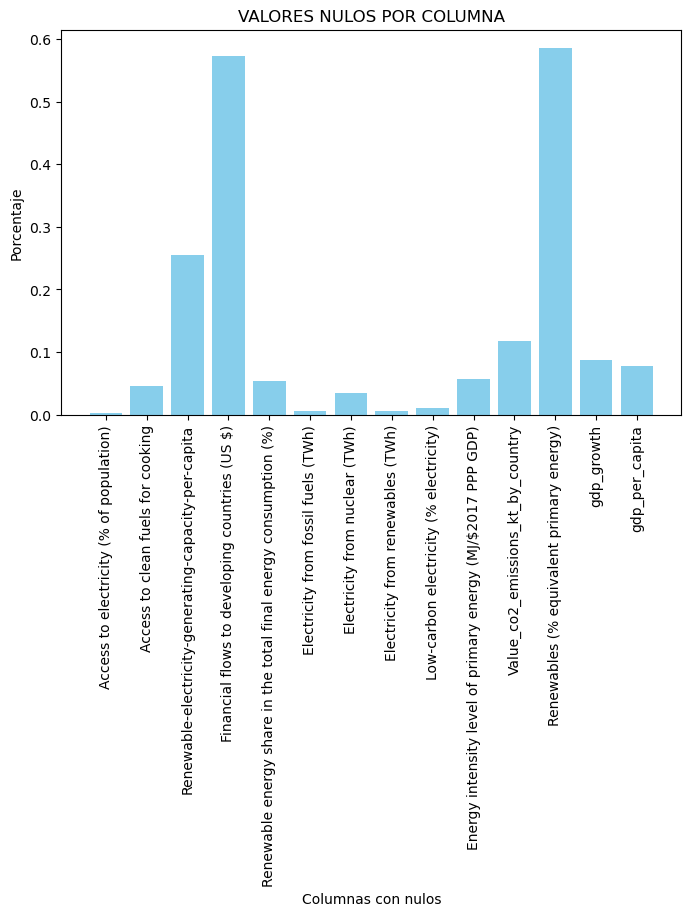

In [178]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(porcentaje_nulos.index, porcentaje_nulos, color='skyblue')
ax.set_title('VALORES NULOS POR COLUMNA')
ax.set_ylabel('Porcentaje')
ax.set_xlabel('Columnas con nulos')

plt.xticks(rotation=90)
plt.tight_layout() 
plt.show()

Notamos que hay varias columna que tiene datos faltantes por lo que procederemos a identificar la escala de cada una. Es decir, clasificaremos entre variables categóricas, continuas y discretas

In [179]:
categoricas = [col for col in dataset.columns if(dataset[col].dtypes == 'object')]
categoricas

['Entity', 'Density (P/Km2)']

In [180]:
categoricas_con_na = [col for col in categoricas if dataset[col].isnull().mean() > 0]
dataset[categoricas_con_na].isnull().mean()

Series([], dtype: float64)

In [181]:
continuas = [col for col in dataset.columns if((dataset[col].dtypes in ['int64', 'float64']) and len(dataset[col].unique()) > 30)]
continuas

['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']

In [182]:
discretas = [col for col in dataset.columns if((dataset[col].dtypes in ['int64', 'float64']) and len(dataset[col].unique()) <= 30)]
discretas

['Year']

In [183]:
discretas_con_na = [col for col in discretas if dataset[col].isnull().mean() > 0]
dataset[discretas_con_na].isnull().mean()

Series([], dtype: float64)

#### 1.1 Imputación de variables numéricas continuas:

Detectamos el porcentaje de faltantes en la variables numéricas continuas y seleccinamos aquellas variables que tiene valores faltantes

In [184]:
continuas_con_na = [col for col in continuas if dataset[col].isnull().mean() > 0]
dataset[continuas_con_na].isnull().mean()

Access to electricity (% of population)                             0.002467
Access to clean fuels for cooking                                   0.046053
Renewable-electricity-generating-capacity-per-capita                0.255208
Financial flows to developing countries (US $)                      0.572368
Renewable energy share in the total final energy consumption (%)    0.053180
Electricity from fossil fuels (TWh)                                 0.005757
Electricity from nuclear (TWh)                                      0.034539
Electricity from renewables (TWh)                                   0.005757
Low-carbon electricity (% electricity)                              0.011513
Energy intensity level of primary energy (MJ/$2017 PPP GDP)         0.056469
Value_co2_emissions_kt_by_country                                   0.117050
Renewables (% equivalent primary energy)                            0.585526
gdp_growth                                                          0.086623

In [185]:
continuas_con_na = [col for col in continuas if dataset[col].isnull().mean() > 0.06]
dataset[continuas_con_na].isnull().mean()

Renewable-electricity-generating-capacity-per-capita    0.255208
Financial flows to developing countries (US $)          0.572368
Value_co2_emissions_kt_by_country                       0.117050
Renewables (% equivalent primary energy)                0.585526
gdp_growth                                              0.086623
gdp_per_capita                                          0.077029
dtype: float64

Dado que todas las variables tiene un porcentaje de NAN's mas grande del 5% será necesario realizar un anális particular para cada caso

##### 1.1.1 Análisis para Variable "Access to electricity (% of population)"

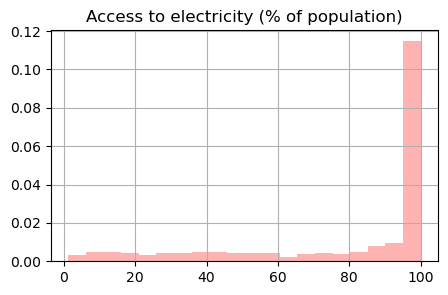

In [186]:
fig = plt.figure(figsize=(5, 3))
dataset['Access to electricity (% of population)'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Access to electricity (% of population)')
plt.show()

##### Imputación por Media y Mediana

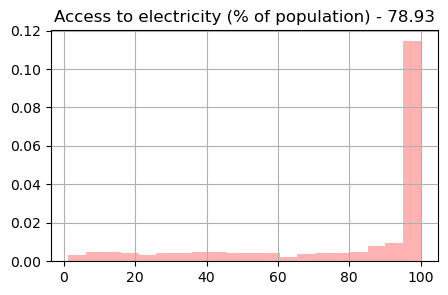

In [187]:
mean_Access_to_electricity_of_population = round(dataset['Access to electricity (% of population)'].mean(), 2)

temp_series = dataset['Access to electricity (% of population)'].fillna(mean_Access_to_electricity_of_population)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Access to electricity (% of population) - ' + str(mean_Access_to_electricity_of_population))
plt.show()

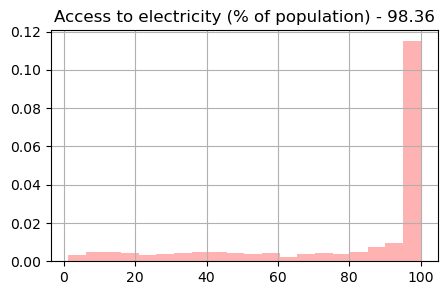

In [188]:
median_Access_to_electricity_of_population = round(dataset['Access to electricity (% of population)'].median(), 2)

temp_series = dataset['Access to electricity (% of population)'].fillna(median_Access_to_electricity_of_population)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Access to electricity (% of population) - ' + str(median_Access_to_electricity_of_population))
plt.show()

Utilizamos la imputacion por mean

In [189]:
dataset['Access to electricity (% of population)'].fillna(mean_Access_to_electricity_of_population, inplace=True)

##### 1.1.2 Análisis para Variable "Access to clean fuels for cooking"

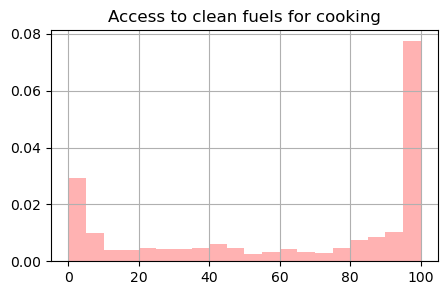

In [190]:
fig = plt.figure(figsize=(5, 3))
dataset['Access to clean fuels for cooking'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Access to clean fuels for cooking')
plt.show()

##### Imputación por Media y Mediana

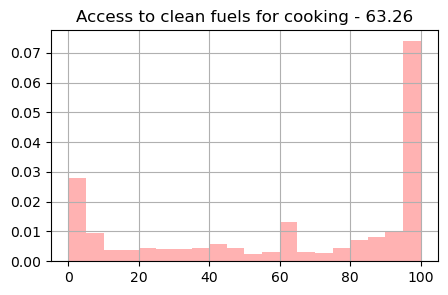

In [191]:
mean_Access_to_clean_fuels_for_cooking = round(dataset['Access to clean fuels for cooking'].mean(), 2)

temp_series = dataset['Access to clean fuels for cooking'].fillna(mean_Access_to_clean_fuels_for_cooking)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Access to clean fuels for cooking - ' + str(mean_Access_to_clean_fuels_for_cooking))
plt.show()

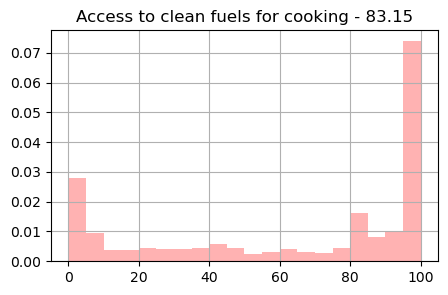

In [192]:
median_Access_to_clean_fuels_for_cooking = round(dataset['Access to clean fuels for cooking'].median(), 2)

temp_series = dataset['Access to clean fuels for cooking'].fillna(median_Access_to_clean_fuels_for_cooking)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Access to clean fuels for cooking - ' + str(median_Access_to_clean_fuels_for_cooking))
plt.show()

Utilizamos la imputacion por mean

In [193]:
dataset['Access to clean fuels for cooking'].fillna(mean_Access_to_clean_fuels_for_cooking, inplace=True)

##### 1.1.3 Análisis para Variable "Renewable-electricity-generating-capacity-per-capita"

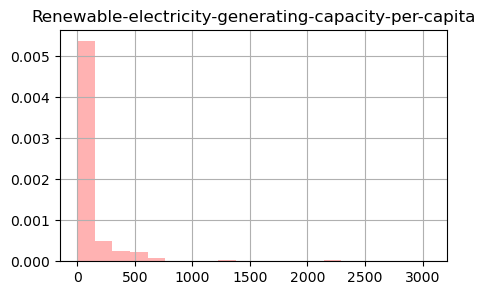

In [194]:
fig = plt.figure(figsize=(5, 3))
dataset['Renewable-electricity-generating-capacity-per-capita'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Renewable-electricity-generating-capacity-per-capita')
plt.show()

##### Imputación por Media y Mediana

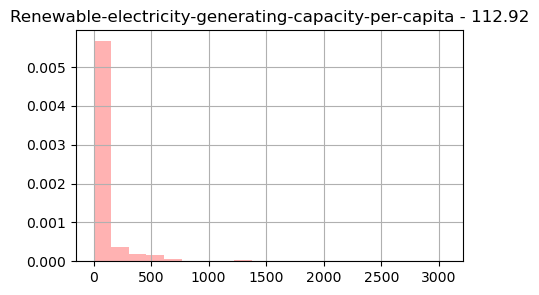

In [195]:
mean_Renewable_electricity_generating_capacity_per_capita = round(dataset['Renewable-electricity-generating-capacity-per-capita'].mean(), 2)

temp_series = dataset['Renewable-electricity-generating-capacity-per-capita'].fillna(mean_Renewable_electricity_generating_capacity_per_capita)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Renewable-electricity-generating-capacity-per-capita - ' + str(mean_Renewable_electricity_generating_capacity_per_capita))
plt.show()

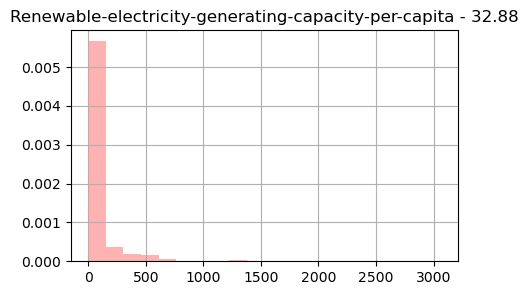

In [196]:
median_Renewable_electricity_generating_capacity_per_capita = round(dataset['Renewable-electricity-generating-capacity-per-capita'].median(), 2)

temp_series = dataset['Renewable-electricity-generating-capacity-per-capita'].fillna(median_Renewable_electricity_generating_capacity_per_capita)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Renewable-electricity-generating-capacity-per-capita - ' + str(median_Renewable_electricity_generating_capacity_per_capita))
plt.show()

Utilizamos la imputacion por median

In [197]:
dataset['Renewable-electricity-generating-capacity-per-capita'].fillna(median_Renewable_electricity_generating_capacity_per_capita, inplace=True)

##### 1.1.4 Análisis de Variable "Financial flows to developing countries (US $)"

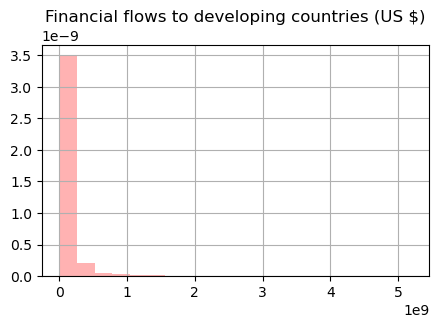

In [198]:
fig = plt.figure(figsize=(5, 3))
dataset['Financial flows to developing countries (US $)'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Financial flows to developing countries (US $)')
plt.show()

##### Imputación por Media y Mediana

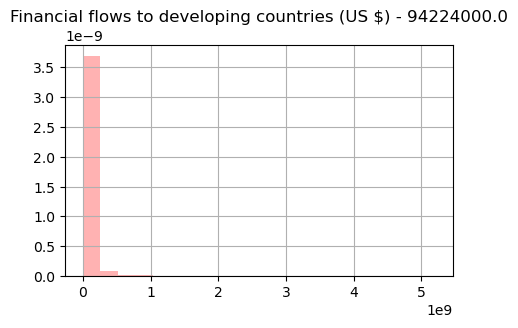

In [199]:
mean_Financial_flows_to_developing_countries = round(dataset['Financial flows to developing countries (US $)'].mean(), 2)

temp_series = dataset['Financial flows to developing countries (US $)'].fillna(mean_Financial_flows_to_developing_countries)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Financial flows to developing countries (US $) - ' + str(mean_Financial_flows_to_developing_countries))
plt.show()

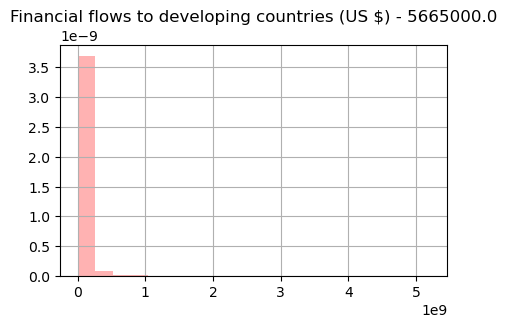

In [200]:
median_Financial_flows_to_developing_countries = round(dataset['Financial flows to developing countries (US $)'].median(), 2)

temp_series = dataset['Financial flows to developing countries (US $)'].fillna(median_Financial_flows_to_developing_countries)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Financial flows to developing countries (US $) - ' + str(median_Financial_flows_to_developing_countries))
plt.show()

Utilizamos la imputacion por median

In [201]:
dataset['Financial flows to developing countries (US $)'].fillna(median_Financial_flows_to_developing_countries, inplace=True)

##### 1.1.5 Análisis de Variable "Renewable energy share in the total final energy consumption (%)"

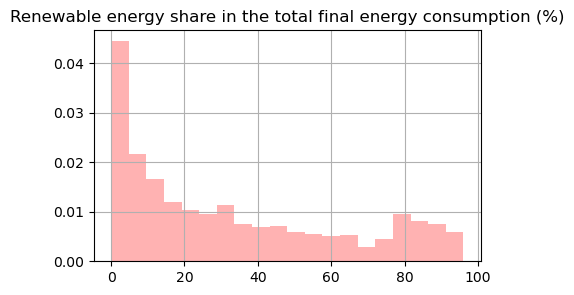

In [202]:
fig = plt.figure(figsize=(5, 3))
dataset['Renewable energy share in the total final energy consumption (%)'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Renewable energy share in the total final energy consumption (%)')
plt.show()

##### Imputación por Media y Mediana

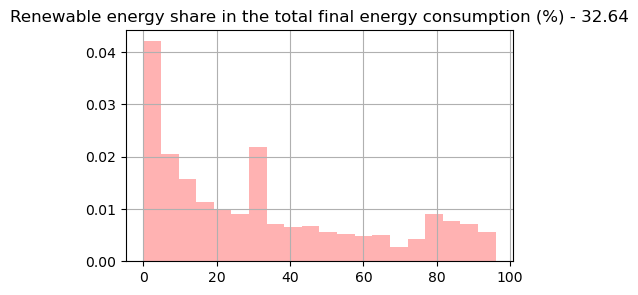

In [203]:
mean_Renewable_energy_share_in_the_total_final_energy_consumption = round(dataset['Renewable energy share in the total final energy consumption (%)'].mean(), 2)

temp_series = dataset['Renewable energy share in the total final energy consumption (%)'].fillna(mean_Renewable_energy_share_in_the_total_final_energy_consumption)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Renewable energy share in the total final energy consumption (%) - ' + str(mean_Renewable_energy_share_in_the_total_final_energy_consumption))
plt.show()

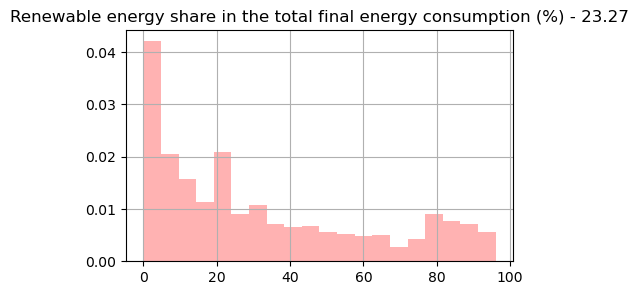

In [204]:
median_Renewable_energy_share_in_the_total_final_energy_consumption = round(dataset['Renewable energy share in the total final energy consumption (%)'].median(), 2)

temp_series = dataset['Renewable energy share in the total final energy consumption (%)'].fillna(median_Renewable_energy_share_in_the_total_final_energy_consumption)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Renewable energy share in the total final energy consumption (%) - ' + str(median_Renewable_energy_share_in_the_total_final_energy_consumption))
plt.show()

Utilizamos la imputacion por median

In [205]:
dataset['Renewable energy share in the total final energy consumption (%)'].fillna(median_Renewable_energy_share_in_the_total_final_energy_consumption, inplace=True)

##### 1.1.6 Análisis de Variable "Electricity from fossil fuels (TWh)"

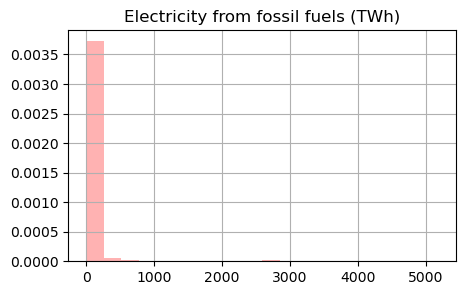

In [206]:
fig = plt.figure(figsize=(5, 3))
dataset['Electricity from fossil fuels (TWh)'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Electricity from fossil fuels (TWh)')
plt.show()

##### Imputación por Media y Mediana

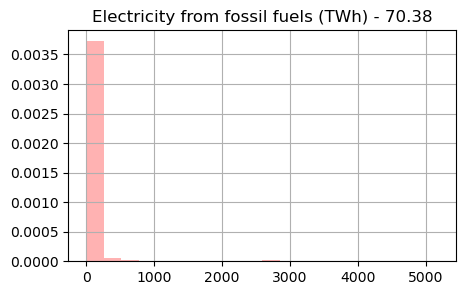

In [207]:
mean_Electricity_from_fossil_fuels = round(dataset['Electricity from fossil fuels (TWh)'].mean(), 2)

temp_series = dataset['Electricity from fossil fuels (TWh)'].fillna(mean_Electricity_from_fossil_fuels)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Electricity from fossil fuels (TWh) - ' + str(mean_Electricity_from_fossil_fuels))
plt.show()

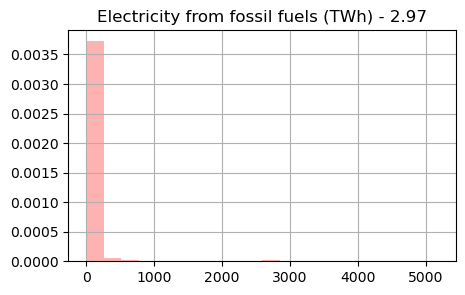

In [208]:
median_Electricity_from_fossil_fuels = round(dataset['Electricity from fossil fuels (TWh)'].median(), 2)

temp_series = dataset['Electricity from fossil fuels (TWh)'].fillna(median_Electricity_from_fossil_fuels)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Electricity from fossil fuels (TWh) - ' + str(median_Electricity_from_fossil_fuels))
plt.show()

Utilizamos la imputacion por median

In [209]:
dataset['Electricity from fossil fuels (TWh)'].fillna(median_Electricity_from_fossil_fuels, inplace=True)

##### 1.1.7 Análisis de Variable "Electricity from nuclear (TWh)"

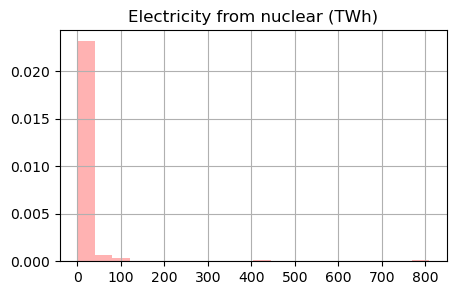

In [210]:
fig = plt.figure(figsize=(5, 3))
dataset['Electricity from nuclear (TWh)'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Electricity from nuclear (TWh)')
plt.show()

##### Imputación por Media y Mediana

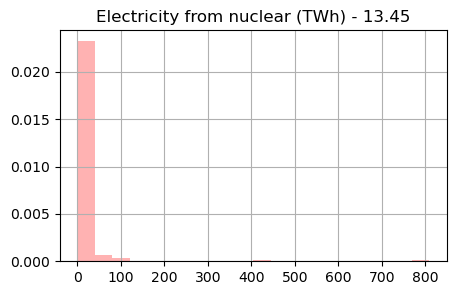

In [211]:
mean_Electricity_from_nuclear = round(dataset['Electricity from nuclear (TWh)'].mean(), 2)

temp_series = dataset['Electricity from nuclear (TWh)'].fillna(mean_Electricity_from_nuclear)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Electricity from nuclear (TWh) - ' + str(mean_Electricity_from_nuclear))
plt.show()

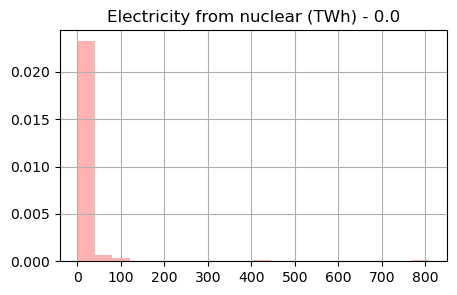

In [212]:
median_Electricity_from_nuclear = round(dataset['Electricity from nuclear (TWh)'].median(), 2)

temp_series = dataset['Electricity from nuclear (TWh)'].fillna(median_Electricity_from_nuclear)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Electricity from nuclear (TWh) - ' + str(median_Electricity_from_nuclear))
plt.show()

Utilizamos la imputacion por median

In [213]:
dataset['Electricity from nuclear (TWh)'].fillna(median_Electricity_from_nuclear, inplace=True)

##### 1.1.8 Análisis de Variable "Electricity from renewables (TWh)"

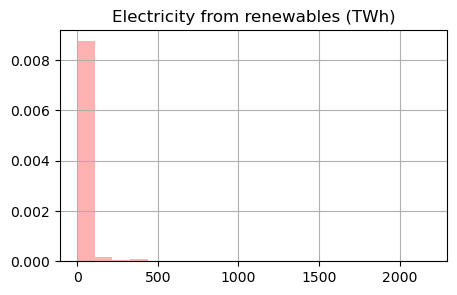

In [214]:
fig = plt.figure(figsize=(5, 3))
dataset['Electricity from renewables (TWh)'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Electricity from renewables (TWh)')
plt.show()

##### Imputación por Media y Mediana

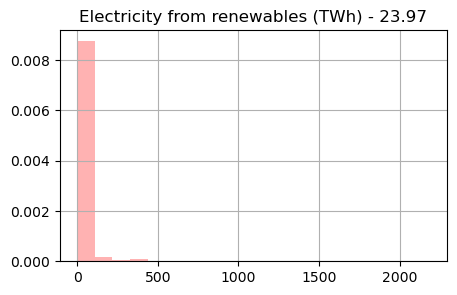

In [215]:
mean_Electricity_from_renewables = round(dataset['Electricity from renewables (TWh)'].mean(), 2)

temp_series = dataset['Electricity from renewables (TWh)'].fillna(mean_Electricity_from_renewables)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Electricity from renewables (TWh) - ' + str(mean_Electricity_from_renewables))
plt.show()

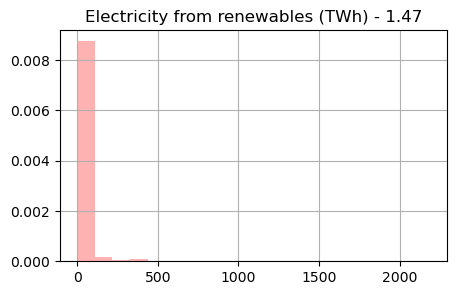

In [216]:
median_Electricity_from_renewables = round(dataset['Electricity from renewables (TWh)'].median(), 2)

temp_series = dataset['Electricity from renewables (TWh)'].fillna(median_Electricity_from_renewables)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Electricity from renewables (TWh) - ' + str(median_Electricity_from_renewables))
plt.show()

Utilizamos la imputacion por median

In [217]:
dataset['Electricity from renewables (TWh)'].fillna(median_Electricity_from_renewables, inplace=True)

##### 1.1.9 Análisis de Variable "Low-carbon electricity (% electricity)"

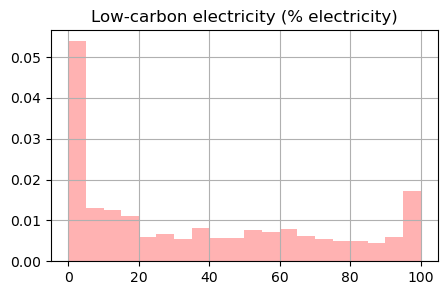

In [218]:
fig = plt.figure(figsize=(5, 3))
dataset['Low-carbon electricity (% electricity)'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Low-carbon electricity (% electricity)')
plt.show()

##### Imputación por Media y Mediana

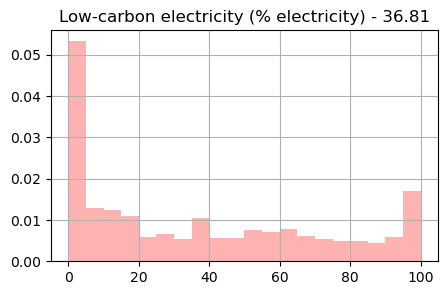

In [219]:
mean_Low_carbon_electricity = round(dataset['Low-carbon electricity (% electricity)'].mean(), 2)

temp_series = dataset['Low-carbon electricity (% electricity)'].fillna(mean_Low_carbon_electricity)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Low-carbon electricity (% electricity) - ' + str(mean_Low_carbon_electricity))
plt.show()

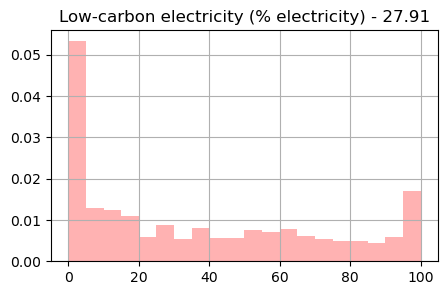

In [220]:
median_Low_carbon_electricity = round(dataset['Low-carbon electricity (% electricity)'].median(), 2)

temp_series = dataset['Low-carbon electricity (% electricity)'].fillna(median_Low_carbon_electricity)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Low-carbon electricity (% electricity) - ' + str(median_Low_carbon_electricity))
plt.show()

Utilizamos la imputacion por median

In [221]:
dataset['Low-carbon electricity (% electricity)'].fillna(median_Low_carbon_electricity, inplace=True)

##### 1.1.3 Análisis de Variable "Energy intensity level of primary energy (MJ/$2017 PPP GDP)"

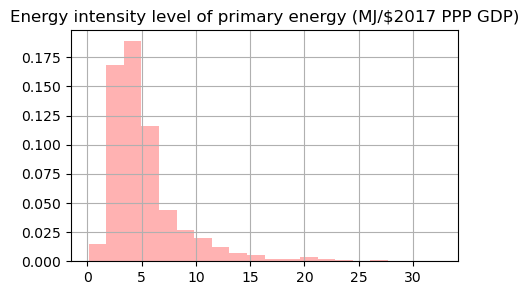

In [222]:
fig = plt.figure(figsize=(5, 3))
dataset['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Energy intensity level of primary energy (MJ/$2017 PPP GDP)')
plt.show()

##### Imputación por Media y Mediana

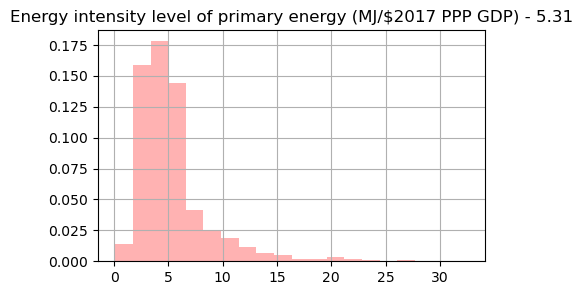

In [223]:
mean_Energy_intensity_level_of_primary_energy = round(dataset['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].mean(), 2)

temp_series = dataset['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(mean_Energy_intensity_level_of_primary_energy)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Energy intensity level of primary energy (MJ/$2017 PPP GDP) - ' + str(mean_Energy_intensity_level_of_primary_energy))
plt.show()

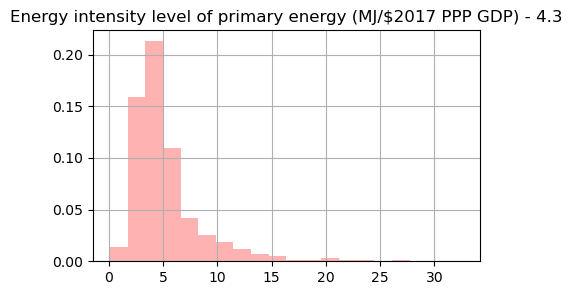

In [224]:
median_Energy_intensity_level_of_primary_energy = round(dataset['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].median(), 2)

temp_series = dataset['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(median_Energy_intensity_level_of_primary_energy)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Energy intensity level of primary energy (MJ/$2017 PPP GDP) - ' + str(median_Energy_intensity_level_of_primary_energy))
plt.show()

Utilizamos la imputacion por median

In [225]:
dataset['Energy intensity level of primary energy (MJ/$2017 PPP GDP)'].fillna(median_Energy_intensity_level_of_primary_energy, inplace=True)

##### 1.1.11 Análisis de Variable "Value_co2_emissions_kt_by_country"

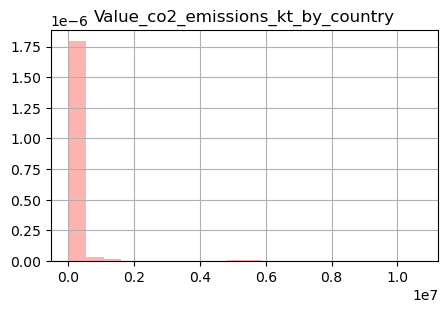

In [226]:
fig = plt.figure(figsize=(5, 3))
dataset['Value_co2_emissions_kt_by_country'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Value_co2_emissions_kt_by_country')
plt.show()

##### Imputación por Media y Mediana

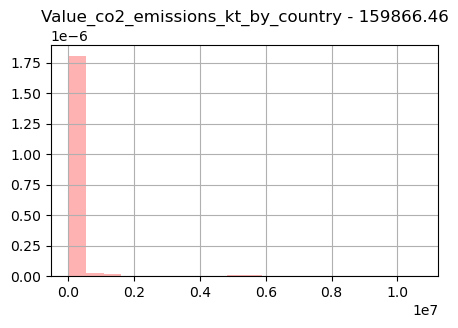

In [227]:
mean_Value_co2_emissions_kt_by_country = round(dataset['Value_co2_emissions_kt_by_country'].mean(), 2)

temp_series = dataset['Value_co2_emissions_kt_by_country'].fillna(mean_Value_co2_emissions_kt_by_country)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Value_co2_emissions_kt_by_country - ' + str(mean_Value_co2_emissions_kt_by_country))
plt.show()

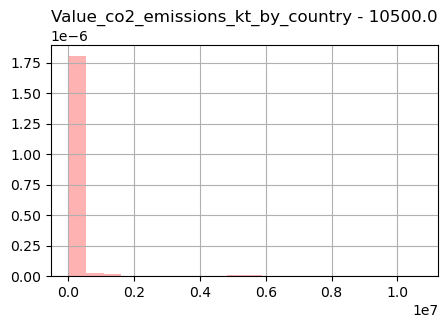

In [228]:
median_Value_co2_emissions_kt_by_country = round(dataset['Value_co2_emissions_kt_by_country'].median(), 2)

temp_series = dataset['Value_co2_emissions_kt_by_country'].fillna(median_Value_co2_emissions_kt_by_country)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Value_co2_emissions_kt_by_country - ' + str(median_Value_co2_emissions_kt_by_country))
plt.show()

Utilizamos la imputacion por median

In [229]:
dataset['Value_co2_emissions_kt_by_country'].fillna(median_Value_co2_emissions_kt_by_country, inplace=True)

##### 1.1.12 Análisis de Variable "Renewables (% equivalent primary energy)"

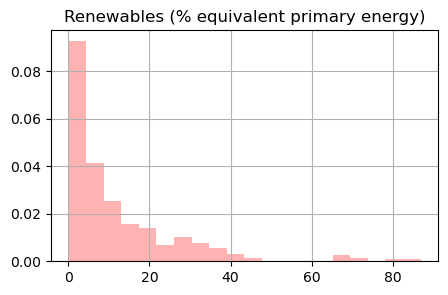

In [230]:
fig = plt.figure(figsize=(5, 3))
dataset['Renewables (% equivalent primary energy)'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Renewables (% equivalent primary energy)')
plt.show()

##### Imputación por Media y Mediana

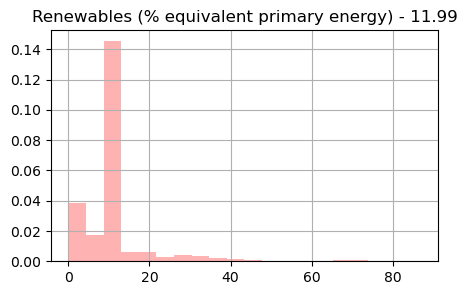

In [231]:
mean_Renewables_equivalent_primary_energy = round(dataset['Renewables (% equivalent primary energy)'].mean(), 2)

temp_series = dataset['Renewables (% equivalent primary energy)'].fillna(mean_Renewables_equivalent_primary_energy)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Renewables (% equivalent primary energy) - ' + str(mean_Renewables_equivalent_primary_energy))
plt.show()

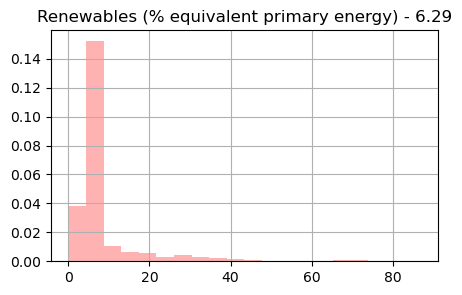

In [232]:
median_Renewables_equivalent_primary_energy = round(dataset['Renewables (% equivalent primary energy)'].median(), 2)

temp_series = dataset['Renewables (% equivalent primary energy)'].fillna(median_Renewables_equivalent_primary_energy)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('Renewables (% equivalent primary energy) - ' + str(median_Renewables_equivalent_primary_energy))
plt.show()

Utilizamos la imputacion por median

In [233]:
dataset['Renewables (% equivalent primary energy)'].fillna(median_Renewables_equivalent_primary_energy, inplace=True)

##### 1.1.13 Análisis de Variable "gdp_growth"


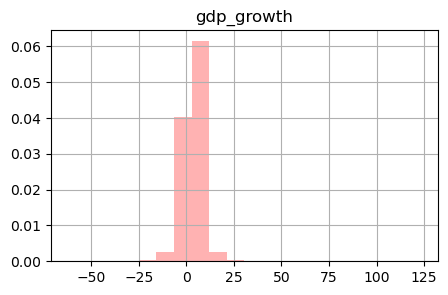

In [234]:
fig = plt.figure(figsize=(5, 3))
dataset['gdp_growth'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('gdp_growth')
plt.show()

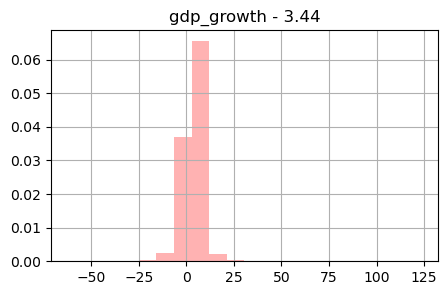

In [235]:
mean_gdp_growth = round(dataset['gdp_growth'].mean(), 2)

temp_series = dataset['gdp_growth'].fillna(mean_gdp_growth)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('gdp_growth - ' + str(mean_gdp_growth))
plt.show()

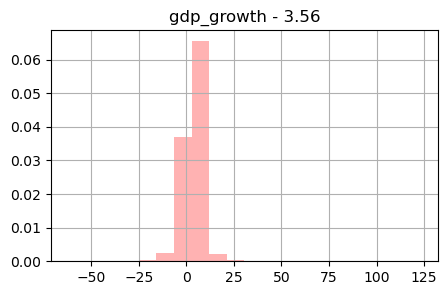

In [236]:
median_gdp_growth = round(dataset['gdp_growth'].median(), 2)

temp_series = dataset['gdp_growth'].fillna(median_gdp_growth)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('gdp_growth - ' + str(median_gdp_growth))
plt.show()

Utilizamos la imputacion por mean

In [237]:
dataset['gdp_growth'].fillna(mean_gdp_growth, inplace=True)

##### 1.1.14 Análisis de Variable "gdp_per_capita"

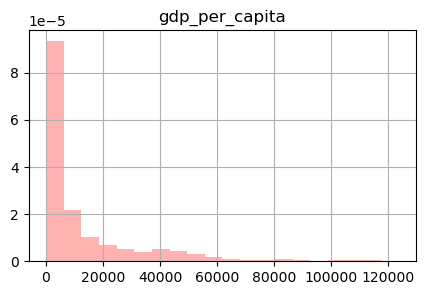

In [238]:
fig = plt.figure(figsize=(5, 3))
dataset['gdp_per_capita'].hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('gdp_per_capita')
plt.show()

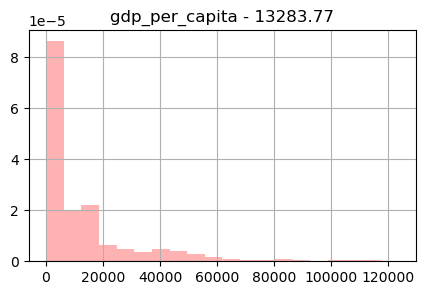

In [239]:
mean_gdp_per_capita = round(dataset['gdp_per_capita'].mean(), 2)

temp_series = dataset['gdp_per_capita'].fillna(mean_gdp_per_capita)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('gdp_per_capita - ' + str(mean_gdp_per_capita))
plt.show()

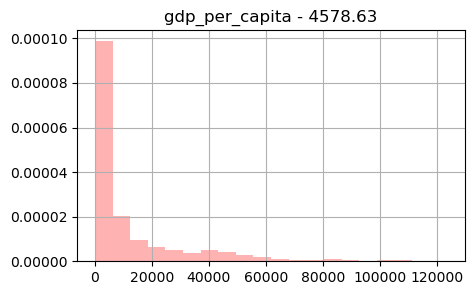

In [240]:
median_gdp_per_capita = round(dataset['gdp_per_capita'].median(), 2)

temp_series = dataset['gdp_per_capita'].fillna(median_gdp_per_capita)

fig = plt.figure(figsize=(5, 3))
temp_series.hist(bins=20, density=True, color='red', alpha=0.3)
plt.title('gdp_per_capita - ' + str(median_gdp_per_capita))
plt.show()

Utilizamos la imputacion por median

In [241]:
dataset['gdp_per_capita'].fillna(median_gdp_per_capita, inplace=True)

#### 1.2 - Imputación de variables numéricas categoricas con faltante

No se realizara ninguna imputacion las las variables discretas y categoricas dado que no tienen faltantes


Para finalizar verificamos el porcentaje de faltantes en todas las columnas nuevamente, para asegurarnos que todos los faltantes se hayan tratado.

In [244]:
pd.DataFrame(dataset.isnull().mean()).transpose()

Entity  Year  Access to electricity (% of population)  \
0     0.0   0.0                                      0.0   

   Access to clean fuels for cooking  \
0                                0.0   

   Renewable-electricity-generating-capacity-per-capita  \
0                                                0.0      

   Financial flows to developing countries (US $)  \
0                                             0.0   

   Renewable energy share in the total final energy consumption (%)  \
0                                                0.0                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                  0.0                             0.0   

   Electricity from renewables (TWh)  ...  \
0                                0.0  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                                0.0    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                                0.0             

   Value_co2_emissions_kt_by_country  \
0                                0.0   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                       0.0         0.0             0.0   

   Density (P/Km2)  Land Area(Km2)  Latitude  Longitude  
0              0.0             0.0       0.0        0.0  

[1 rows x 21 columns]

####  Escritura de Archivo de Variables a Disco.

In [245]:
dataset.to_csv("fase_1_proy.csv", index=False)

#### 2. Para las variables que se consideren continuas aplique el tratamiento de Outliers
####  Capping de final de cola

In [247]:
dataset_proy =pd.read_csv("fase_1_proy.csv")
dataset_proy.head()

Entity  Year  Access to electricity (% of population)  \
0  Afghanistan  2000                                 1.613591   
1  Afghanistan  2001                                 4.074574   
2  Afghanistan  2002                                 9.409158   
3  Afghanistan  2003                                14.738506   
4  Afghanistan  2004                                20.064968   

   Access to clean fuels for cooking  \
0                                6.2   
1                                7.2   
2                                8.2   
3                                9.5   
4                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                       5665000.0   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  ...  \
0                               0.31  ...   
1                               0.50  ...   
2                               0.56  ...   
3                               0.63  ...   
4                               0.56  ...   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                      6.29    3.440000     4578.630000   
1                                      6.29    3.440000     4578.630000   
2                                      6.29    3.440000      179.426579   
3                                      6.29    8.832278      190.683814   
4                                      6.29    1.414118      211.382074   

   Density (P/Km2) Land Area(Km2)  Latitude  Longitude  
0               60         652230  33.93911  67.709953  
1            

In [251]:
def get_variables_scale(dataset):
    continuas = [col for col in dataset.columns if dataset[col].dtype in ['float64','int64'] and len(dataset[col].unique())>30]
    discretas = [col for col in dataset.columns if dataset[col].dtype in ['float64','int64'] and len(dataset[col].unique())<=30]

    return continuas, discretas

In [252]:
cont, disct = get_variables_scale(dataset_proy)

In [253]:
cont

['Access to electricity (% of population)',
 'Access to clean fuels for cooking',
 'Renewable-electricity-generating-capacity-per-capita',
 'Financial flows to developing countries (US $)',
 'Renewable energy share in the total final energy consumption (%)',
 'Electricity from fossil fuels (TWh)',
 'Electricity from nuclear (TWh)',
 'Electricity from renewables (TWh)',
 'Low-carbon electricity (% electricity)',
 'Primary energy consumption per capita (kWh/person)',
 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
 'Value_co2_emissions_kt_by_country',
 'Renewables (% equivalent primary energy)',
 'gdp_growth',
 'gdp_per_capita',
 'Land Area(Km2)',
 'Latitude',
 'Longitude']

In [269]:
# creamos un dataframe para las variables continuas 
proy_cont = pd.DataFrame(dataset_proy)
cont, disct = get_variables_scale(proy_cont)
df_continuas = proy_cont[cont]
df_continuas.head()

Access to electricity (% of population)  Access to clean fuels for cooking  \
0                                 1.613591                                6.2   
1                                 4.074574                                7.2   
2                                 9.409158                                8.2   
3                                14.738506                                9.5   
4                                20.064968                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                         20000.0   
1                                        130000.0   
2                                       3950000.0   
3                                      25970000.0   
4                                       5665000.0   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
0                               0.31                               65.957440   
1                               0.50                               84.745766   
2                               0.56                               81.159424   
3                               0.63                               67.021280   
4                               0.56                               62.921350   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                      6.29    3.440000     4578.630000   
1                                      6.29    3.440000     4578.630000   
2                                      6.29    3.440000      179.426579   
3                                      6.29    8.832278      190.683814   
4                                      6.29    1.414118      211.382074   

   Land Area(Km2)  Latitude  Longitude  
0          65223

In [246]:
# Funcion para graficar las variables de la columna hotel_cont
def plot_outliers_analysis(dataset, col):
    plt.figure(figsize=(10,2))
    print(col)
    plt.subplot(131)
    dataset[col].hist(bins=50, density=True, color='red')
    plt.title("Densidad -Histograma")
    plt.subplot(132)
    stats.probplot(dataset[col], dist = "norm", plot=plt)
    plt.title("QQ-Plot")
    plt.subplot(133)
    sns.boxplot(y=dataset[col])
    plt.title("Boxplot")
    plt.show()

Access to electricity (% of population)


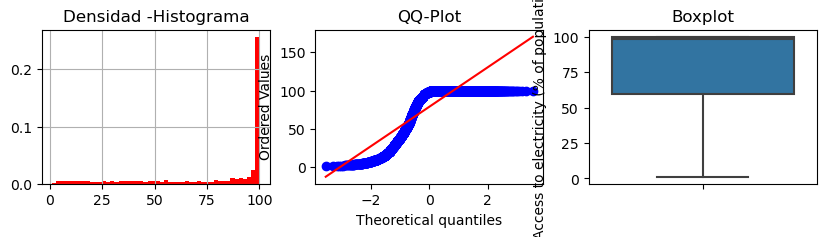

Access to clean fuels for cooking


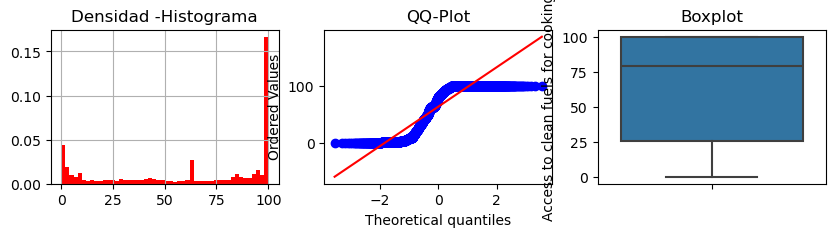

Renewable-electricity-generating-capacity-per-capita


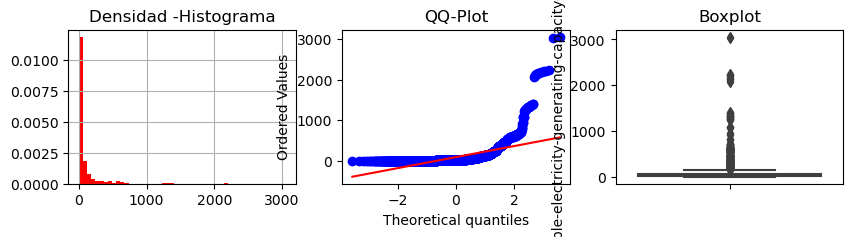

Financial flows to developing countries (US $)


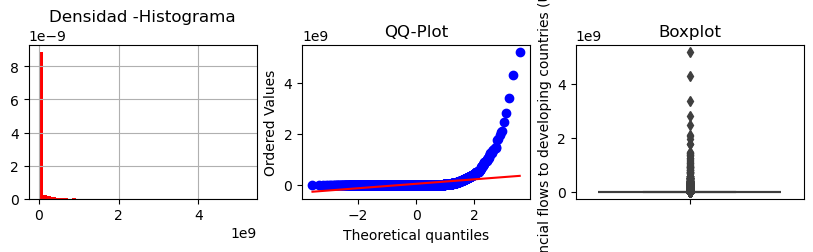

Renewable energy share in the total final energy consumption (%)


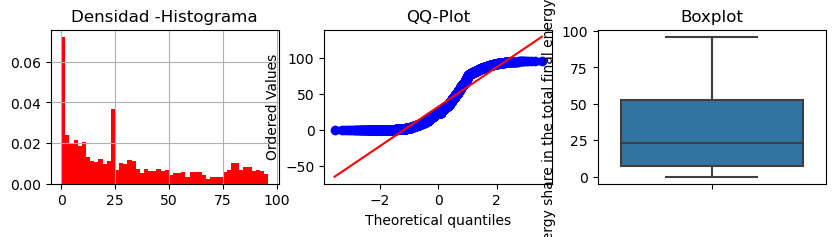

Electricity from fossil fuels (TWh)


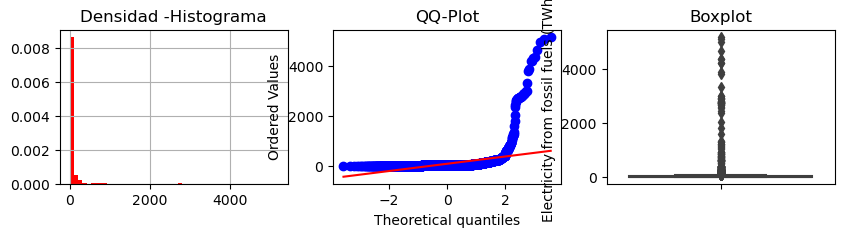

Electricity from nuclear (TWh)


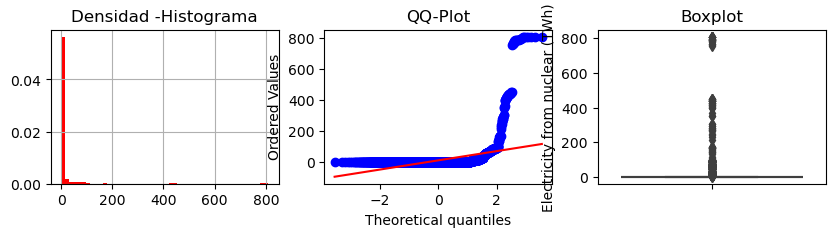

Electricity from renewables (TWh)


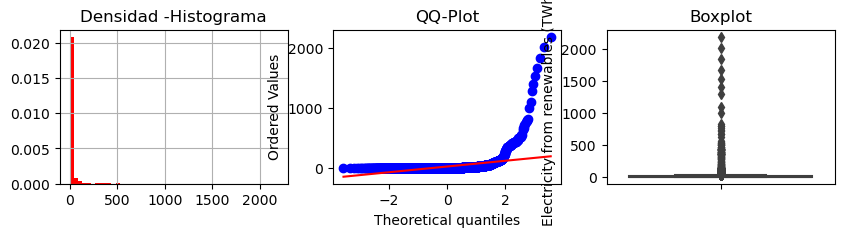

Low-carbon electricity (% electricity)


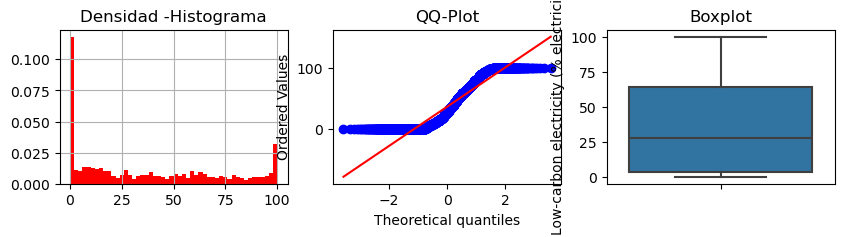

Primary energy consumption per capita (kWh/person)


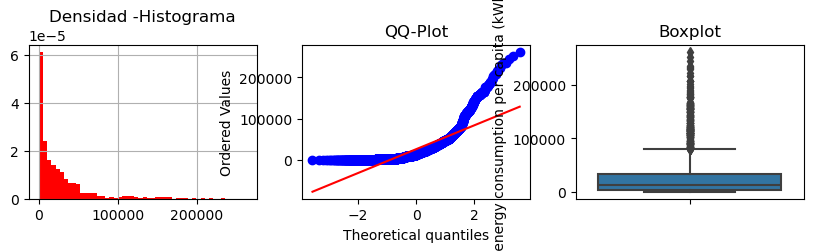

Energy intensity level of primary energy (MJ/$2017 PPP GDP)


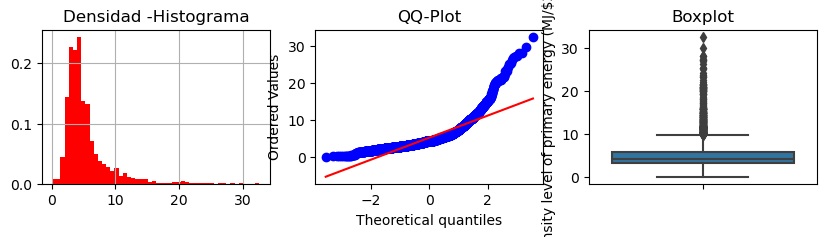

Value_co2_emissions_kt_by_country


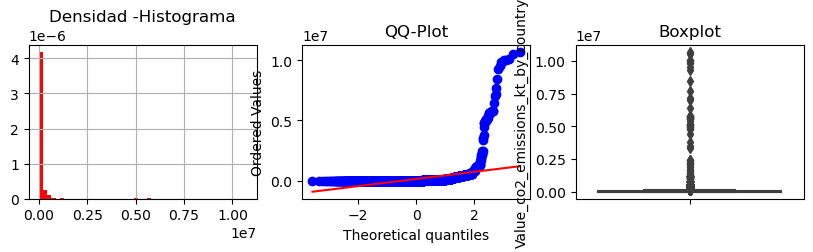

Renewables (% equivalent primary energy)


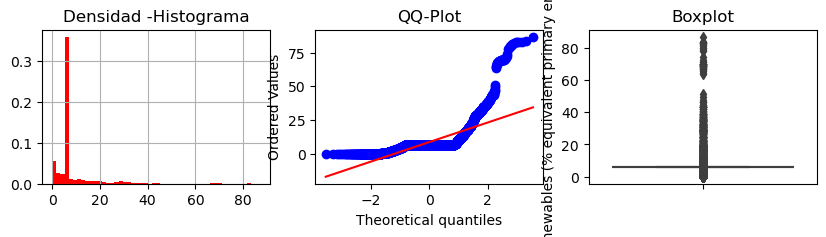

gdp_growth


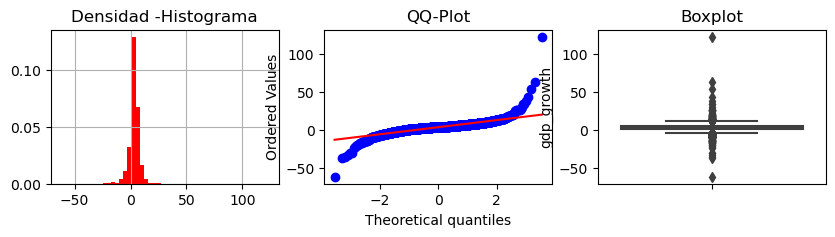

gdp_per_capita


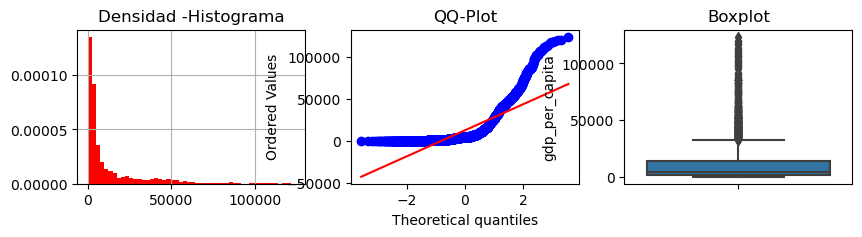

Land Area(Km2)


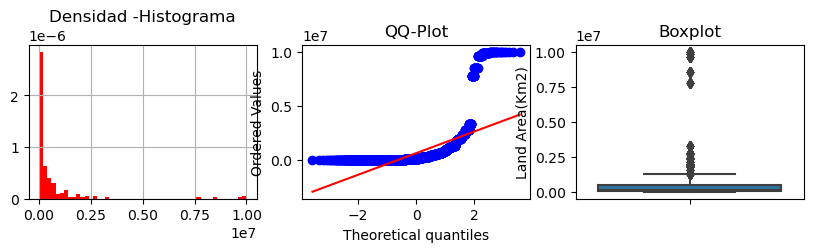

Latitude


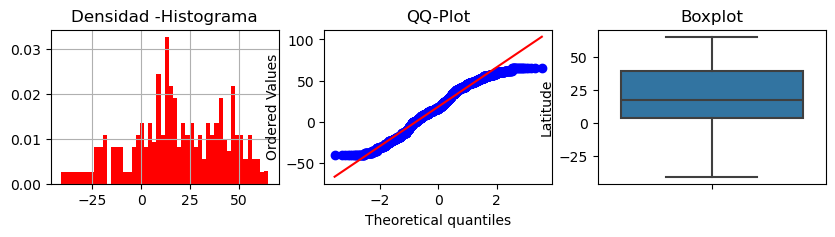

Longitude


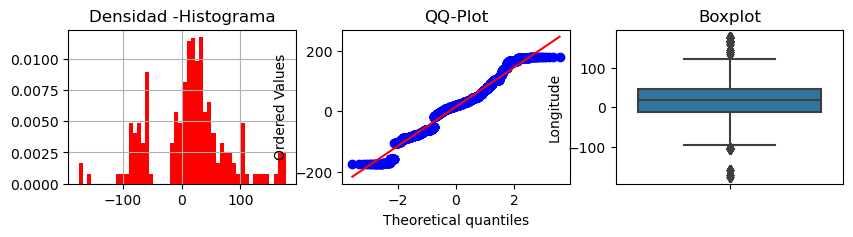

In [270]:
for col in cont:
    plot_outliers_analysis(proy_cont, col)

In [256]:
# Funcion para la detecion de Outliers
def get_outliers_limits(dataset, col1):
    IQR = dataset_proy[col].quantile(0.75)-dataset_proy[col].quantile(0.25)
    LI = dataset_proy[col].quantile(0.25) -(1.5*IQR)
    LS = dataset_proy[col].quantile(0.75) + (1.5*IQR)

    return LI, LS 

In [271]:
get_outliers_limits(df_continuas, df_continuas.columns)

(-98.7491465, 133.1688735)

In [272]:
#Creamos un nuevo dataframe para guardar las variables que se les aplico outliers

capped_df = pd.DataFrame()

for col in df_continuas.columns:
    LI, LS = get_outliers_limits(df_continuas, col)
    capped_df[col] = np.where(df_continuas[col] > LS, LS,
                              np.where(df_continuas[col] < LI, LI,
                                       df_continuas[col]))


capped_df.head()

Access to electricity (% of population)  Access to clean fuels for cooking  \
0                                 1.613591                                6.2   
1                                 4.074574                                7.2   
2                                 9.409158                                8.2   
3                                14.738506                                9.5   
4                                20.064968                               10.9   

   Renewable-electricity-generating-capacity-per-capita  \
0                                               9.22      
1                                               8.86      
2                                               8.47      
3                                               8.09      
4                                               7.75      

   Financial flows to developing countries (US $)  \
0                                       5665000.0   
1                                       5665000.0   
2                                       5665000.0   
3                                       5665000.0   
4                                       5665000.0   

   Renewable energy share in the total final energy consumption (%)  \
0                                              44.99                  
1                                              45.60                  
2                                              37.83                  
3                                              36.66                  
4                                              44.24                  

   Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
0                                 0.16                             0.0   
1                                 0.09                             0.0   
2                                 0.13                             0.0   
3                                 0.31                             0.0   
4                                 0.33                             0.0   

   Electricity from renewables (TWh)  Low-carbon electricity (% electricity)  \
0                               0.31                               65.957440   
1                               0.50                               84.745766   
2                               0.56                               81.159424   
3                               0.63                               67.021280   
4                               0.56                               62.921350   

   Primary energy consumption per capita (kWh/person)  \
0                                          302.59482    
1                                          236.89185    
2                                          210.86215    
3                                          229.96822    
4                                          204.23125    

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)  \
0                                               1.64             
1                                               1.74             
2                                               1.40             
3                                               1.40             
4                                               1.20             

   Value_co2_emissions_kt_by_country  \
0                         760.000000   
1                         730.000000   
2                        1029.999971   
3                        1220.000029   
4                        1029.999971   

   Renewables (% equivalent primary energy)  gdp_growth  gdp_per_capita  \
0                                      6.29    3.440000     4578.630000   
1                                      6.29    3.440000     4578.630000   
2                                      6.29    3.440000      179.426579   
3                                      6.29    8.832278      190.683814   
4                                      6.29    1.414118      211.382074   

   Land Area(Km2)  Latitude  Longitude  
0        652230.

In [273]:
get_outliers_limits(capped_df, capped_df.columns)

(-98.7491465, 133.1688735)

Access to electricity (% of population)


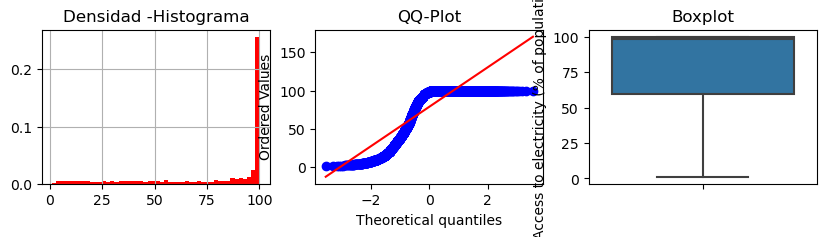

Access to clean fuels for cooking


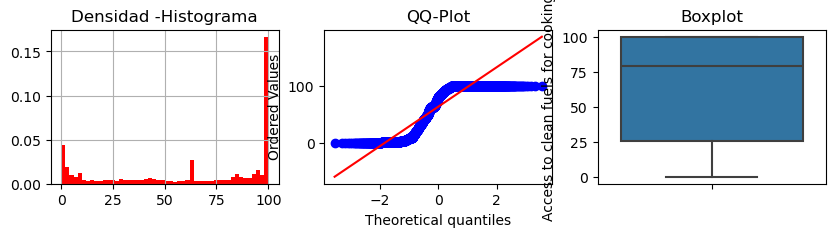

Renewable-electricity-generating-capacity-per-capita


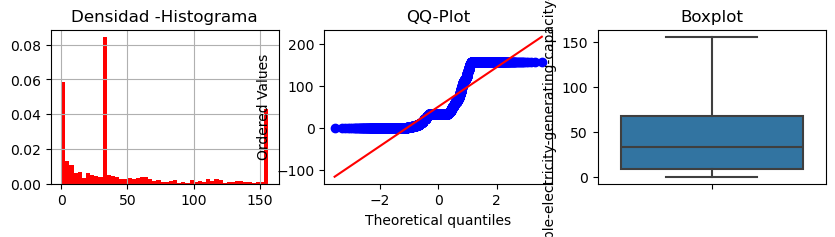

Financial flows to developing countries (US $)


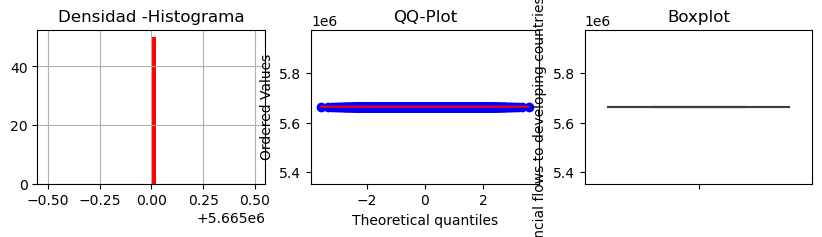

Renewable energy share in the total final energy consumption (%)


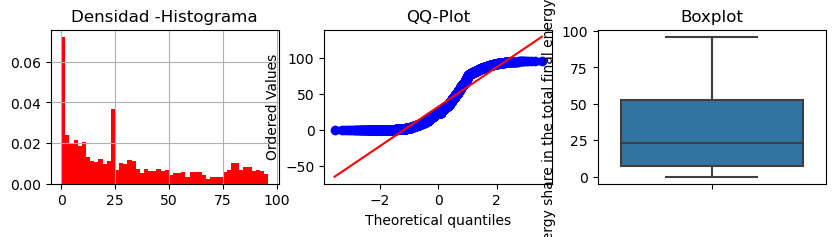

Electricity from fossil fuels (TWh)


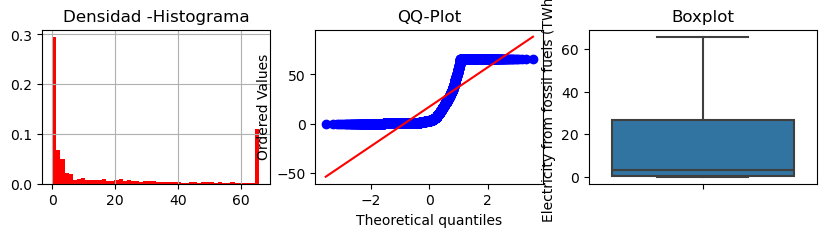

Electricity from nuclear (TWh)


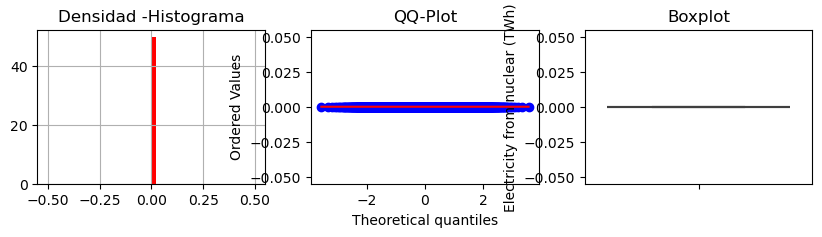

Electricity from renewables (TWh)


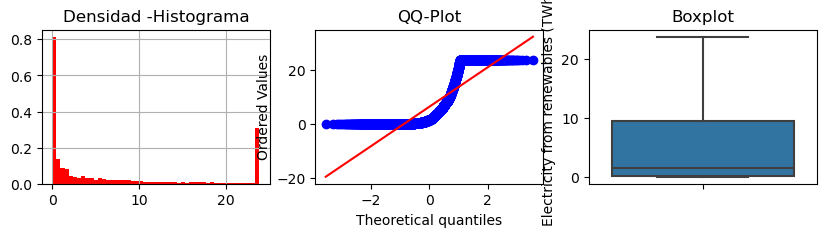

Low-carbon electricity (% electricity)


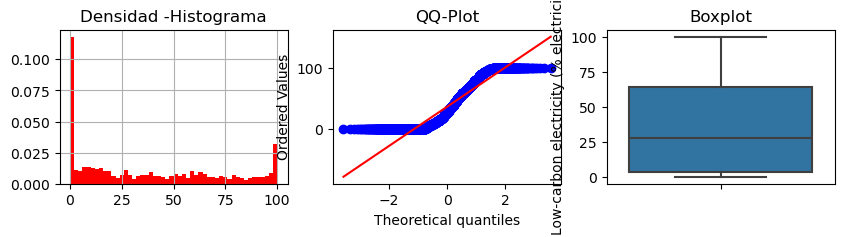

Primary energy consumption per capita (kWh/person)


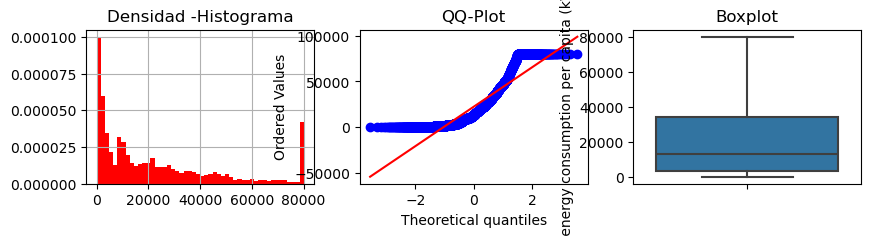

Energy intensity level of primary energy (MJ/$2017 PPP GDP)


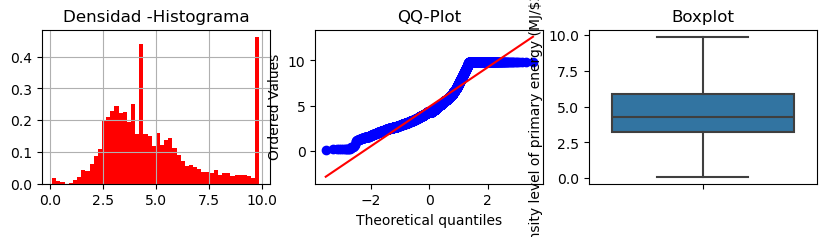

Value_co2_emissions_kt_by_country


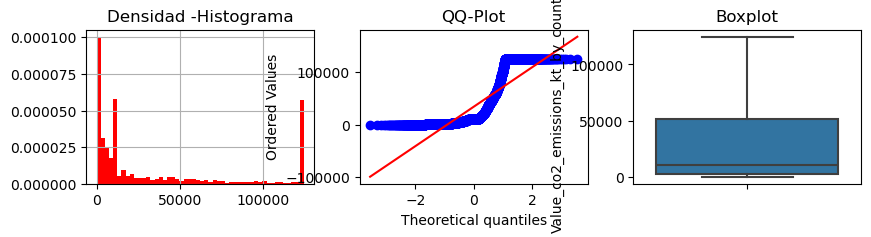

Renewables (% equivalent primary energy)


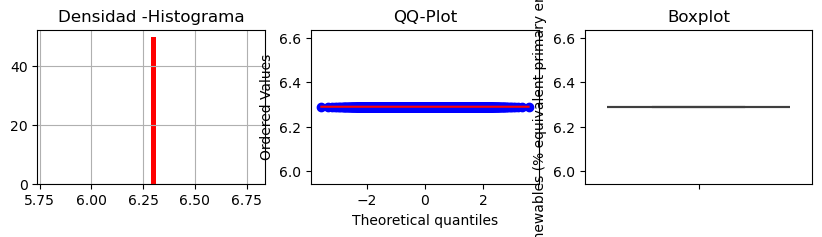

gdp_growth


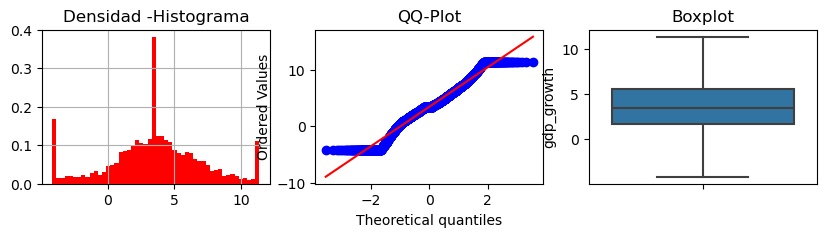

gdp_per_capita


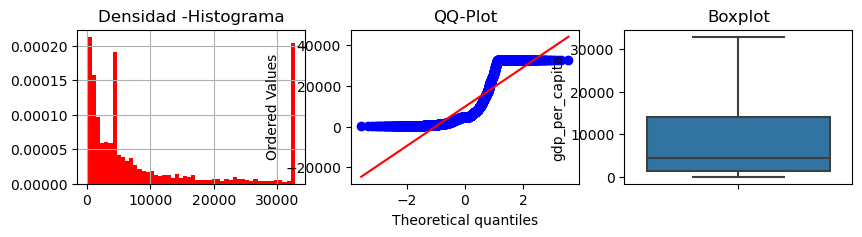

Land Area(Km2)


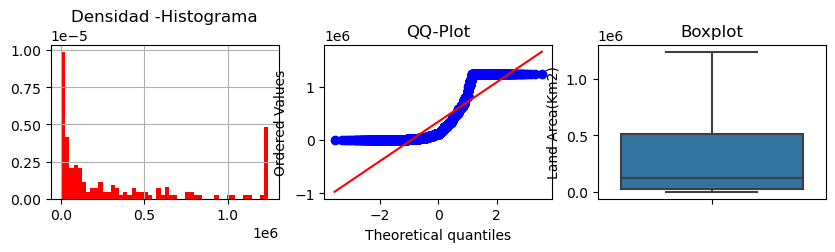

Latitude


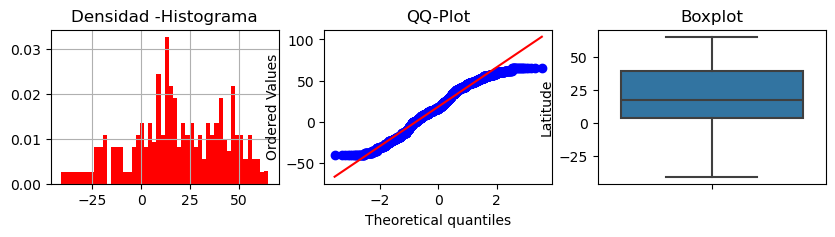

Longitude


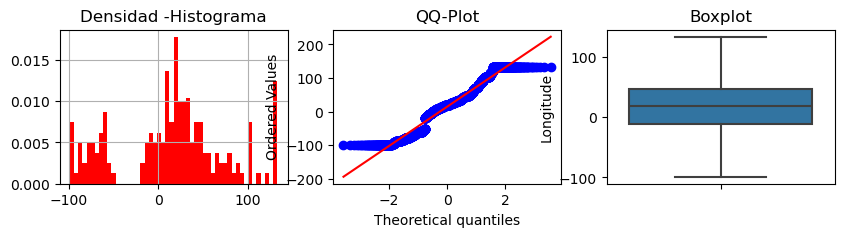

In [274]:
#Graficamos todas las variables de nuestro nuevo daraframe

for col in cont:
    plot_outliers_analysis(capped_df, col)

### 3. Posteriormente para las variables tratadas con outliers, verifique la forma de ladistribución y determine si es necesario aplicar algún tipo de transformación devariables para mejorar la forma de las distribuciones. 

####  De ser el caso aplique la transformación que considere pertinente a fin de normalizar lo más posible la distribución de probabilidad de cada variable y mejorar el rendimiento del modelo. Recuerde que puede aplicar las siguientes transformaciones:
#### a. Logarítmica,
#### b. Exponencial,
#### c. Polinomial,
#### d. Box-Cox,
#### e. Yeo-Johnson

Funcion para graficar la dencidad

In [275]:
def plot_density_qq(df,variable):

    plt.figure(figsize=(7,4))

    plt.subplot(121)
    df[variable].hist(bins=30)
    plt.title(variable)

    plt.subplot(122)
    stats.probplot(df[variable], dist= 'norm', plot=plt)
    plt.show()

#### 1. Para "Access to electricity (% of population)"

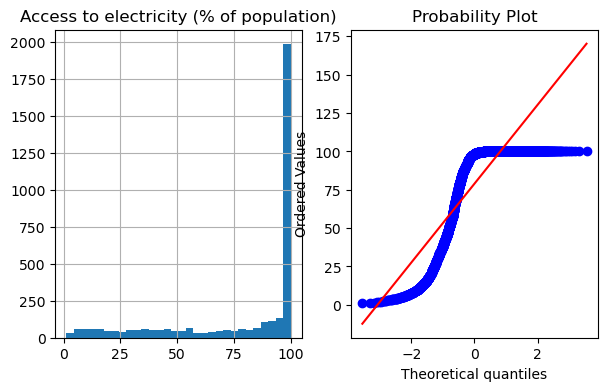

In [276]:
col = "Access to electricity (% of population)"
plot_density_qq(capped_df, col)

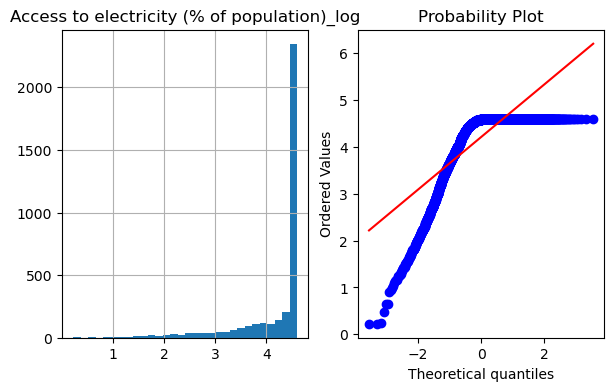

In [277]:
#Transformacion logaritmica

capped_df[col + '_log'] = np.log(capped_df[col])
plot_density_qq(capped_df, col + '_log')

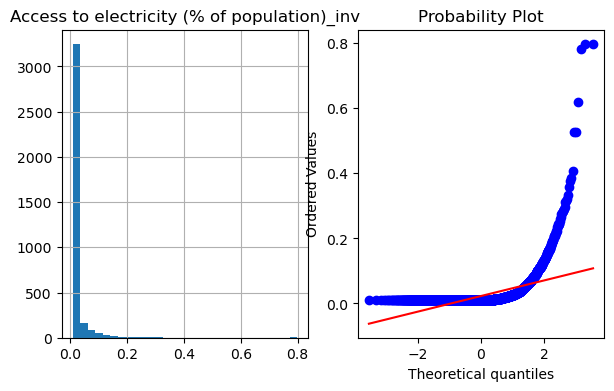

In [278]:
#Transformacion Inversa

capped_df[col + '_inv'] = 1/(capped_df[col])
plot_density_qq(capped_df, col + '_inv')

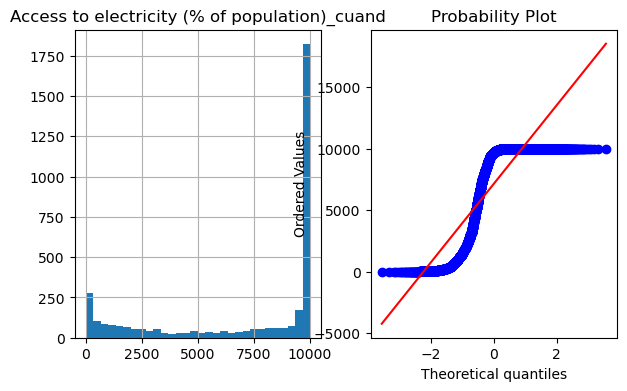

In [279]:
#Trasformacion Polinomial orden 2

capped_df[col + '_cuand'] = (capped_df[col])**2
plot_density_qq(capped_df, col + '_cuand')

1.9652


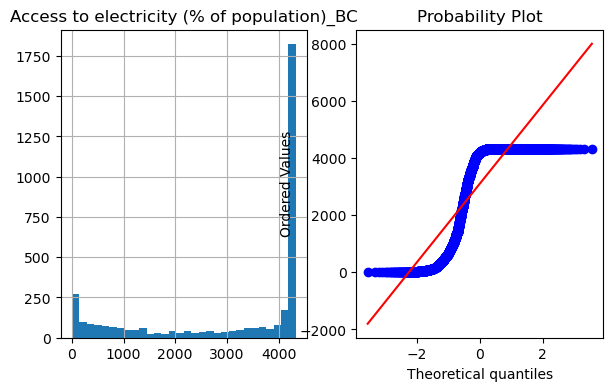

In [280]:
#Transformacion Box -Cox

capped_df[col + '_BC'], lmbd = stats.boxcox(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_BC')

2.029


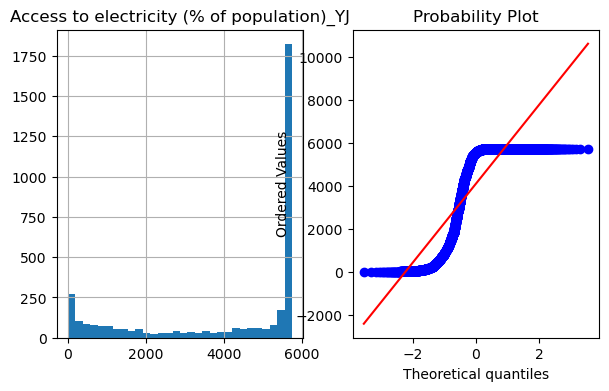

In [281]:
#Transformacion Yeo Johnson

capped_df[col + '_YJ'], lmbd = stats.yeojohnson(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_YJ')

#### 2. Para "Access to clean fuels for cooking"

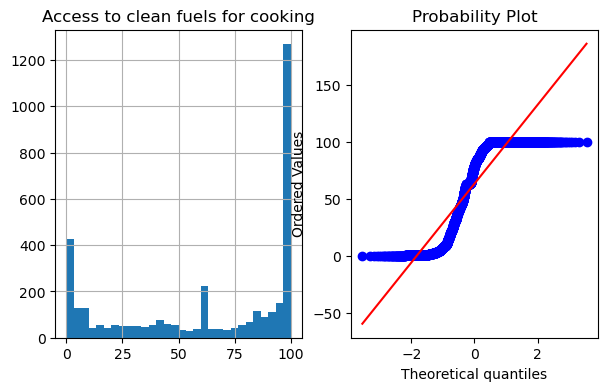

In [282]:
col = "Access to clean fuels for cooking"
plot_density_qq(capped_df, col)

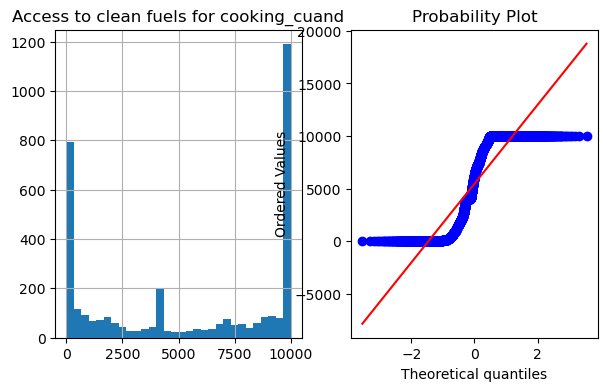

In [285]:
#Trasformacion Polinomial orden 2

capped_df[col + '_cuand'] = (capped_df[col])**2
plot_density_qq(capped_df, col + '_cuand')

0.8097


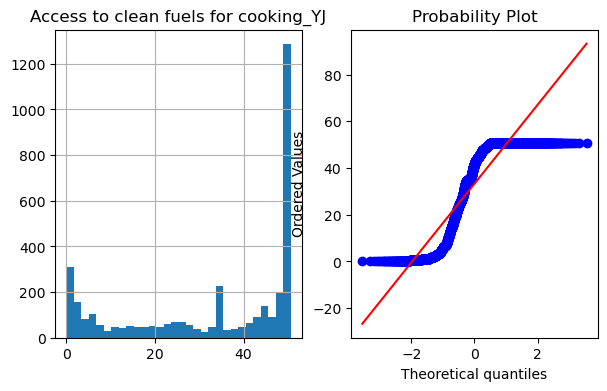

In [287]:
#Transformacion Yeo Johnson

capped_df[col + '_YJ'], lmbd = stats.yeojohnson(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_YJ')

#### 3. Para "Renewable-electricity-generating-capacity-per-capita"

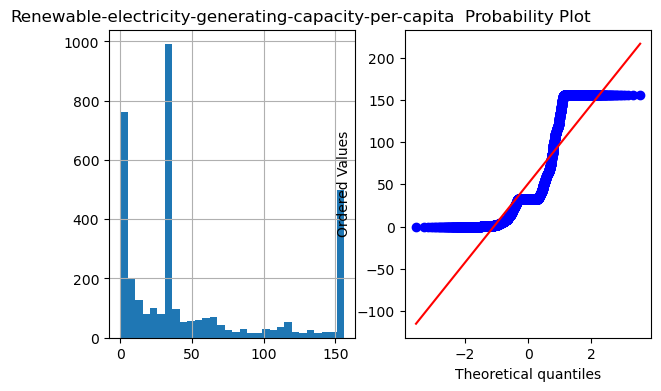

In [288]:
col = "Renewable-electricity-generating-capacity-per-capita"
plot_density_qq(capped_df, col)

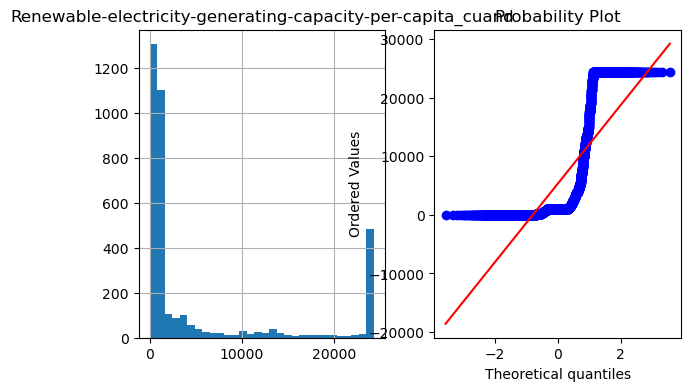

In [291]:
#Trasformacion Polinomial orden 2

capped_df[col + '_cuand'] = (capped_df[col])**2
plot_density_qq(capped_df, col + '_cuand')

0.2644


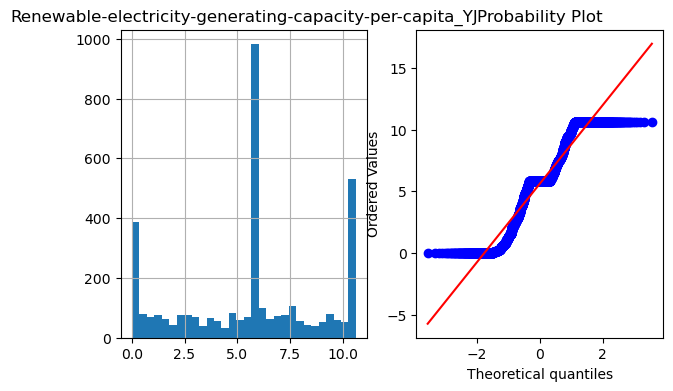

In [293]:
#Transformacion Yeo Johnson

capped_df[col + '_YJ'], lmbd = stats.yeojohnson(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_YJ')

#### 3. Para "Renewable-electricity-generating-capacity-per-capita"

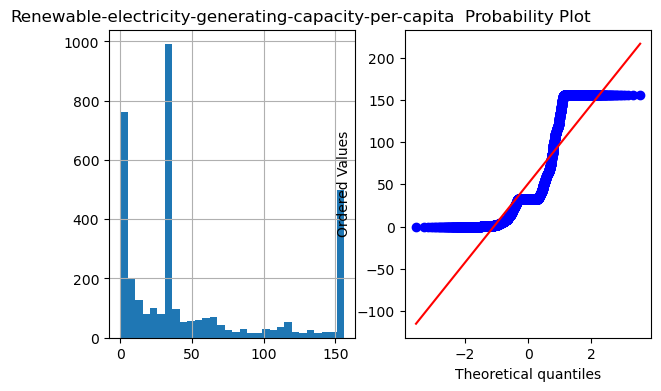

In [294]:
col = "Renewable-electricity-generating-capacity-per-capita"
plot_density_qq(capped_df, col)

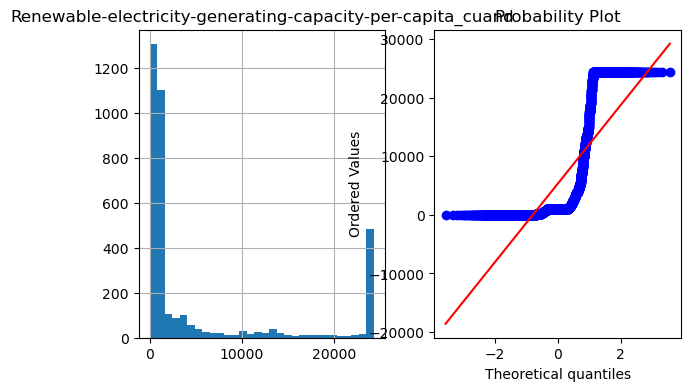

In [297]:
#Trasformacion Polinomial orden 2

capped_df[col + '_cuand'] = (capped_df[col])**2
plot_density_qq(capped_df, col + '_cuand')

0.2644


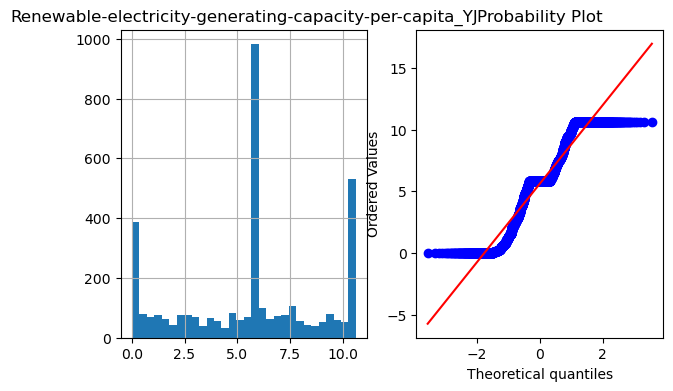

In [299]:
#Transformacion Yeo Johnson

capped_df[col + '_YJ'], lmbd = stats.yeojohnson(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_YJ')

#### 4. Para "Financial flows to developing countries (US $)"

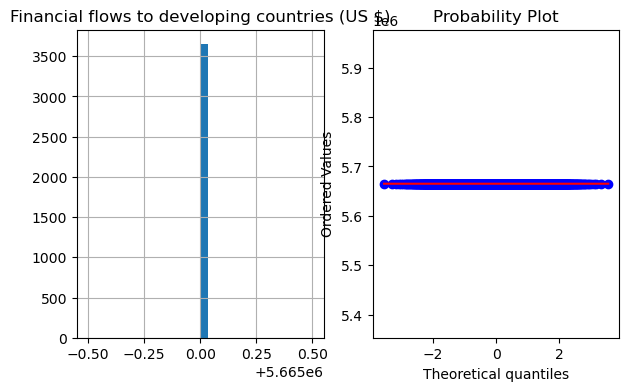

In [300]:
col = "Financial flows to developing countries (US $)"
plot_density_qq(capped_df, col)

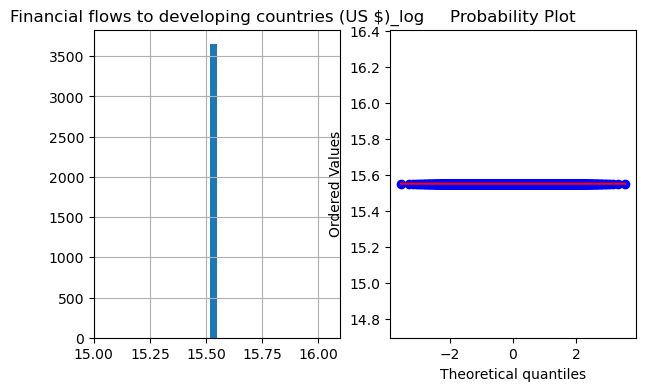

In [301]:
#Transformacion logaritmica

capped_df[col + '_log'] = np.log(capped_df[col])
plot_density_qq(capped_df, col + '_log')

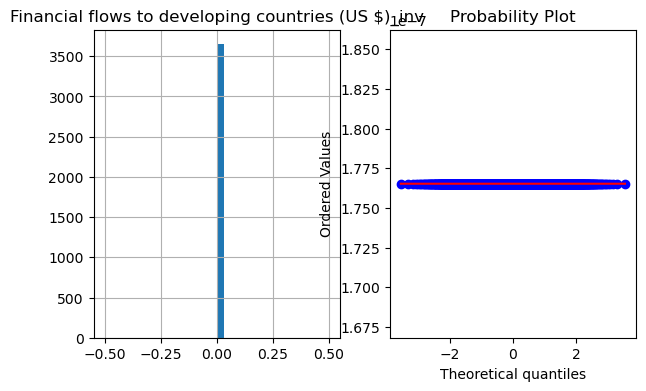

In [302]:
#Transformacion Inversa

capped_df[col + '_inv'] = 1/(capped_df[col])
plot_density_qq(capped_df, col + '_inv')

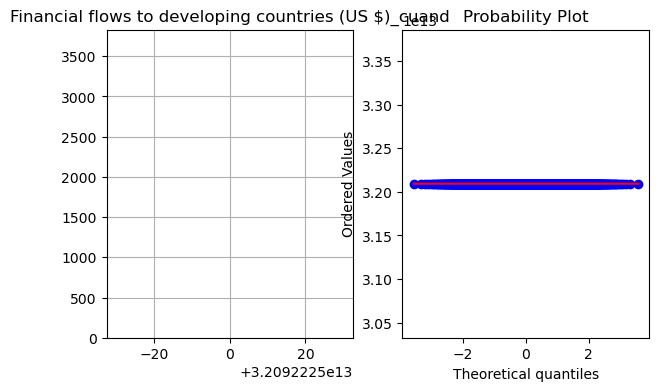

In [303]:
#Trasformacion Polinomial orden 2

capped_df[col + '_cuand'] = (capped_df[col])**2
plot_density_qq(capped_df, col + '_cuand')


0.1967


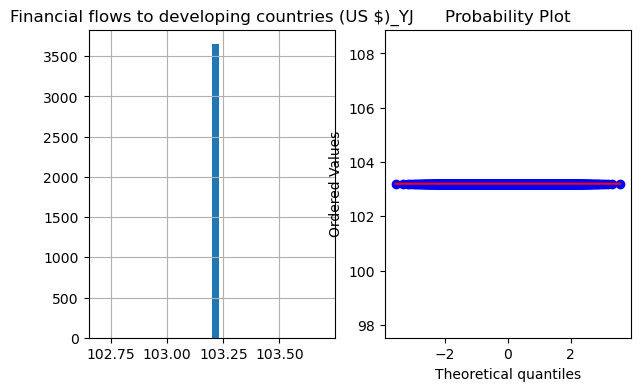

In [305]:
#Transformacion Yeo Johnson

capped_df[col + '_YJ'], lmbd = stats.yeojohnson(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_YJ')

#### 5. Para "Renewable energy share in the total final energy consumption (%)"

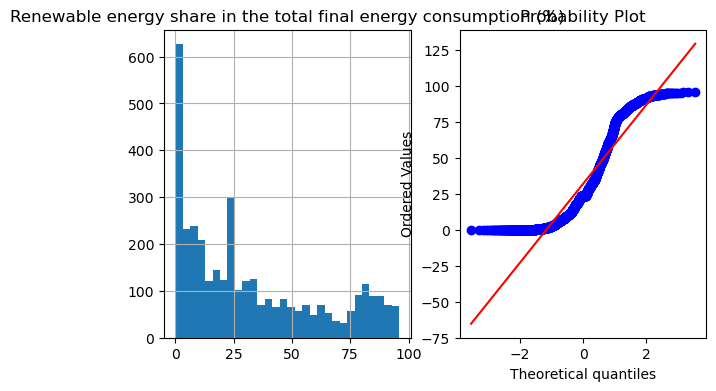

In [306]:
col = "Renewable energy share in the total final energy consumption (%)"
plot_density_qq(capped_df, col)

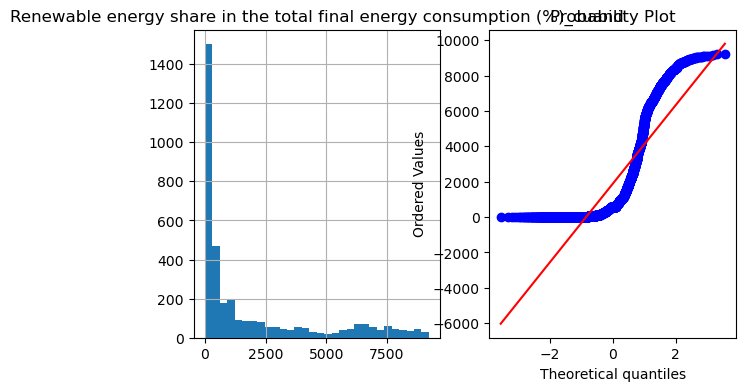

In [309]:
#Trasformacion Polinomial orden 2

capped_df[col + '_cuand'] = (capped_df[col])**2
plot_density_qq(capped_df, col + '_cuand')

0.307


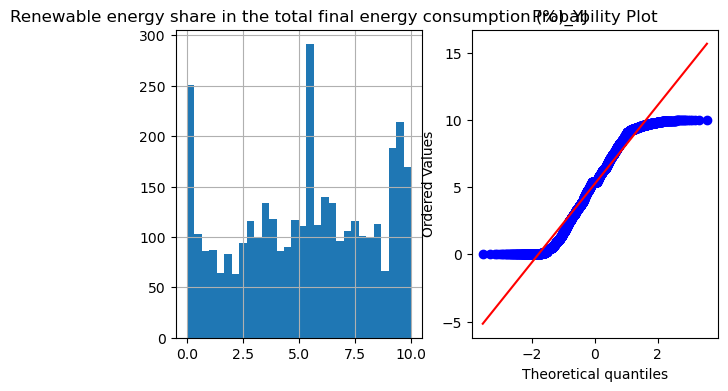

In [311]:
#Transformacion Yeo Johnson

capped_df[col + '_YJ'], lmbd = stats.yeojohnson(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_YJ')

#### 6. Para "Electricity from fossil fuels (TWh)"

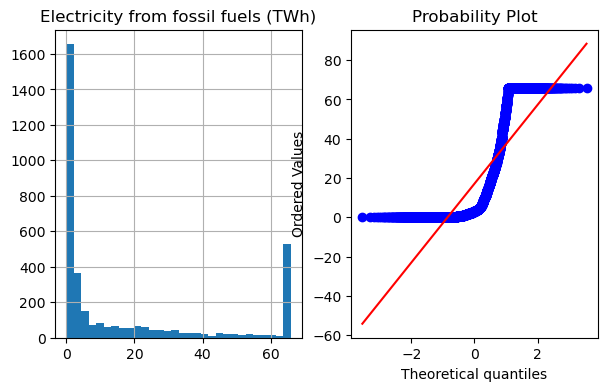

In [312]:
col = "Electricity from fossil fuels (TWh)"
plot_density_qq(capped_df, col)

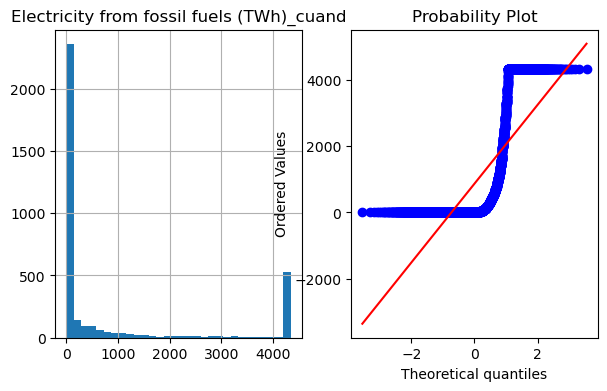

In [315]:
#Trasformacion Polinomial orden 2

capped_df[col + '_cuand'] = (capped_df[col])**2
plot_density_qq(capped_df, col + '_cuand')

-0.1922


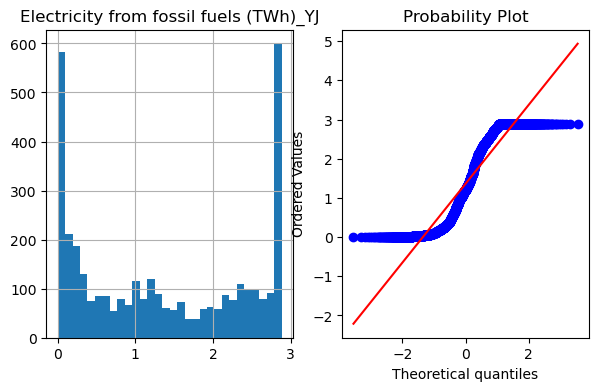

In [317]:
#Transformacion Yeo Johnson

capped_df[col + '_YJ'], lmbd = stats.yeojohnson(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_YJ')

#### 7. Para "Electricity from nuclear (TWh)"

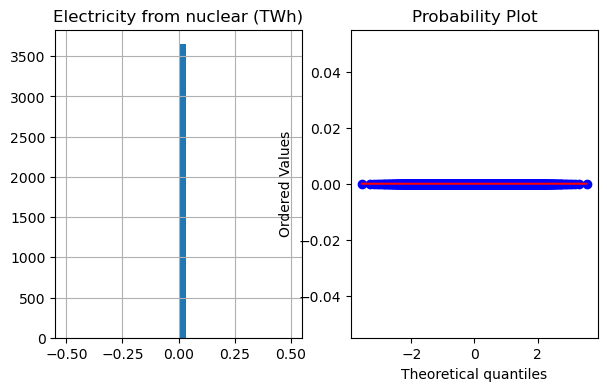

In [318]:
col = "Electricity from nuclear (TWh)"
plot_density_qq(capped_df, col)

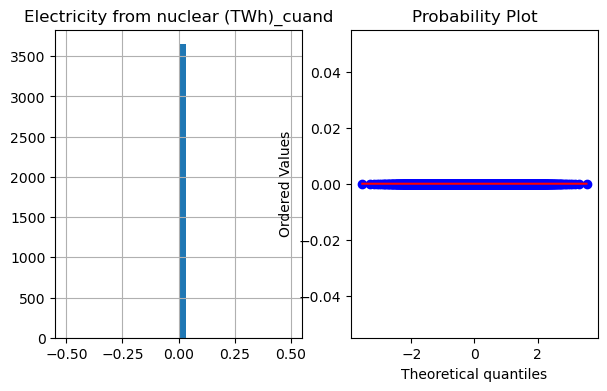

In [321]:
#Trasformacion Polinomial orden 2

capped_df[col + '_cuand'] = (capped_df[col])**2
plot_density_qq(capped_df, col + '_cuand')

#### 8. Para "Electricity from renewables (TWh)"

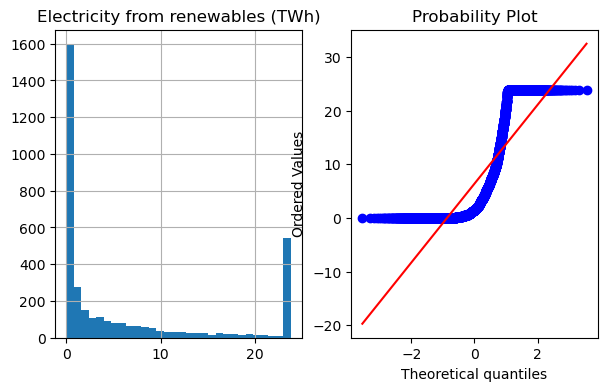

In [324]:
col = "Electricity from renewables (TWh)"
plot_density_qq(capped_df, col)

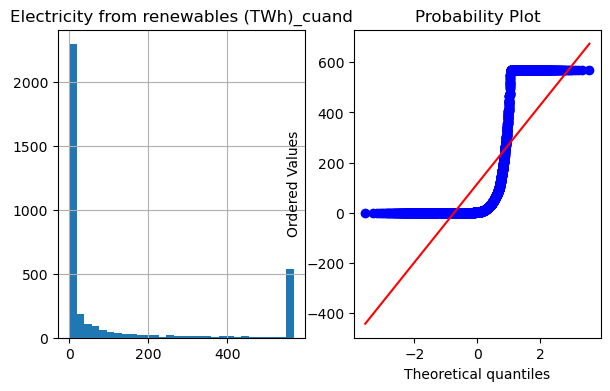

In [327]:
#Trasformacion Polinomial orden 2

capped_df[col + '_cuand'] = (capped_df[col])**2
plot_density_qq(capped_df, col + '_cuand')

-0.3133


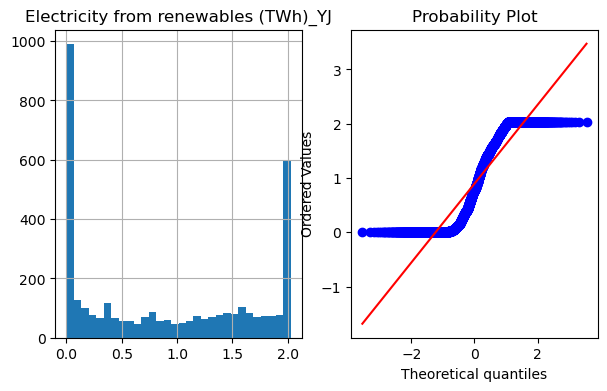

In [329]:
#Transformacion Yeo Johnson

capped_df[col + '_YJ'], lmbd = stats.yeojohnson(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_YJ')


#### 9. Para "Low-carbon electricity (% electricity)"

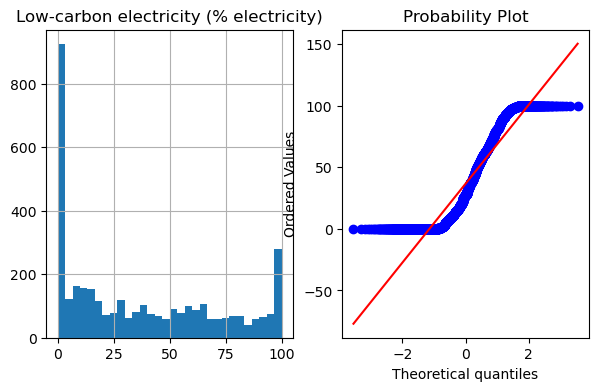

In [331]:
col = "Low-carbon electricity (% electricity)"
plot_density_qq(capped_df, col)

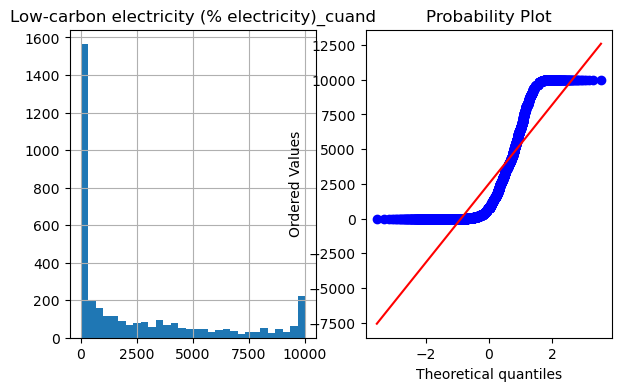

In [334]:
#Trasformacion Polinomial orden 2

capped_df[col + '_cuand'] = (capped_df[col])**2
plot_density_qq(capped_df, col + '_cuand')

0.3055


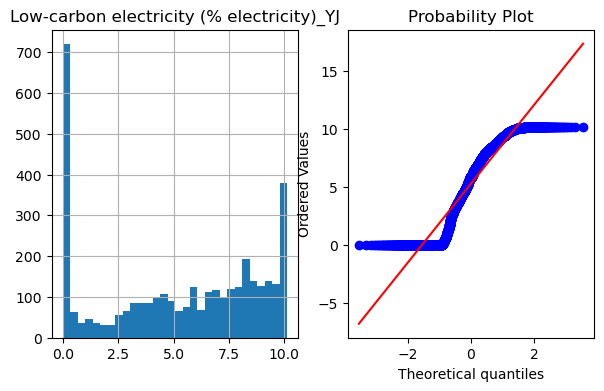

In [336]:
#Transformacion Yeo Johnson

capped_df[col + '_YJ'], lmbd = stats.yeojohnson(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_YJ')

#### 10. Para "Energy intensity level of primary energy (MJ/$2017 PPP GDP)"

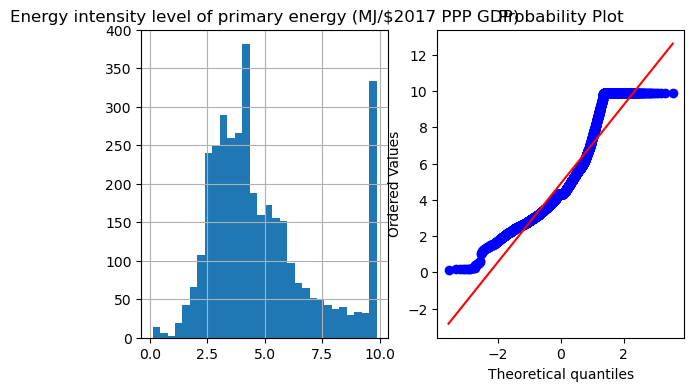

In [337]:
col = "Energy intensity level of primary energy (MJ/$2017 PPP GDP)"
plot_density_qq(capped_df, col)

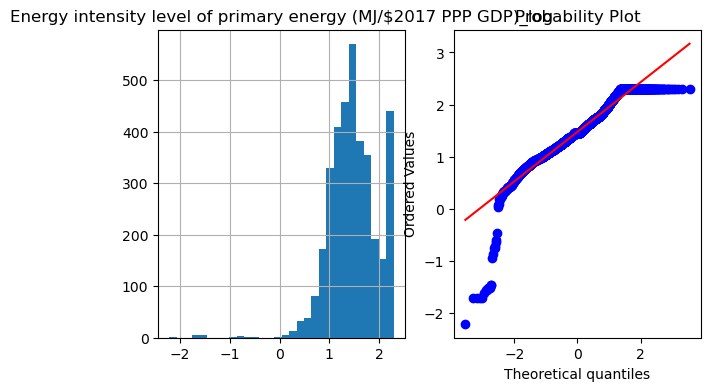

In [338]:
#Transformacion logaritmica

capped_df[col + '_log'] = np.log(capped_df[col])
plot_density_qq(capped_df, col + '_log')

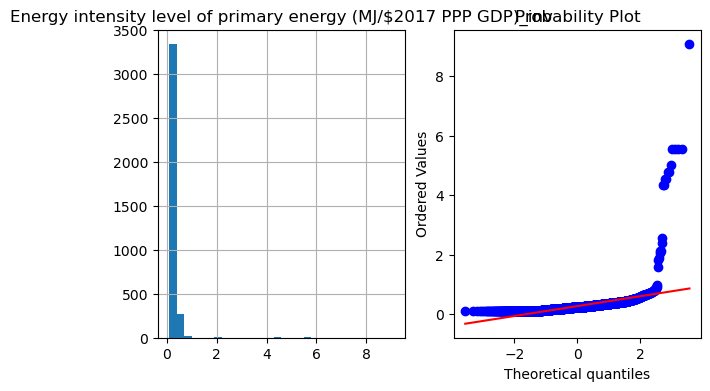

In [339]:
#Transformacion Inversa

capped_df[col + '_inv'] = 1/(capped_df[col])
plot_density_qq(capped_df, col + '_inv')

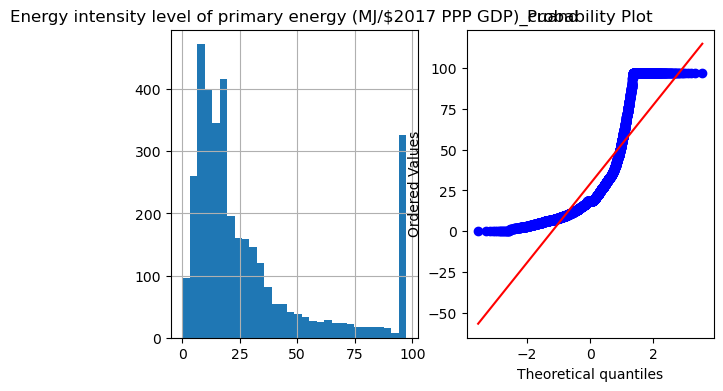

In [340]:
#Trasformacion Polinomial orden 2

capped_df[col + '_cuand'] = (capped_df[col])**2
plot_density_qq(capped_df, col + '_cuand')

0.3158


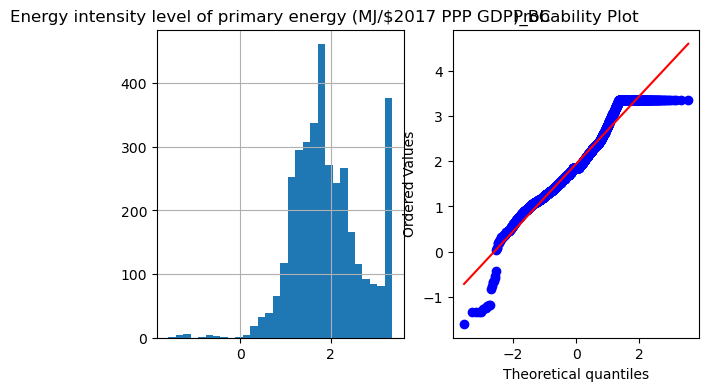

In [341]:
#Transformacion Box -Cox

capped_df[col + '_BC'], lmbd = stats.boxcox(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_BC')

0.0172


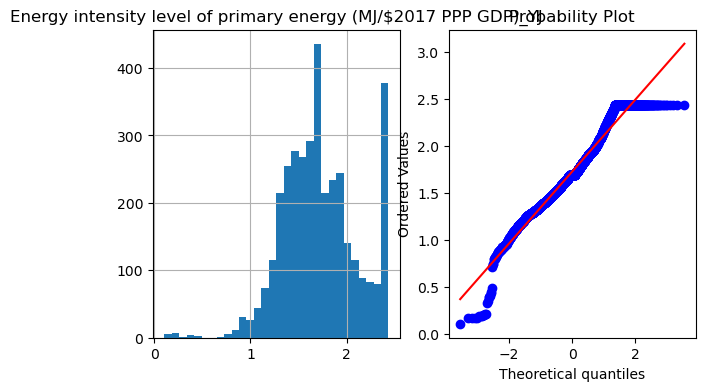

In [342]:
#Transformacion Yeo Johnson

capped_df[col + '_YJ'], lmbd = stats.yeojohnson(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_YJ')

#### 11. Para "Value_co2_emissions_kt_by_country"

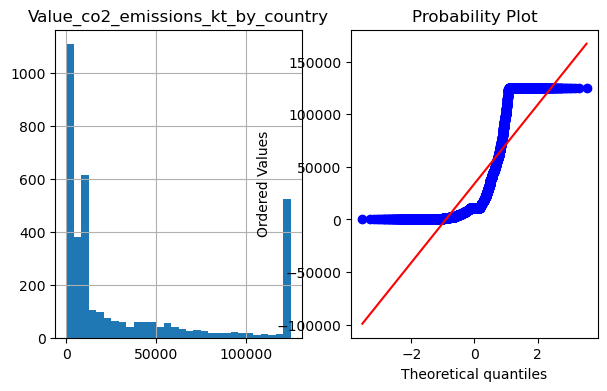

In [343]:
col = "Value_co2_emissions_kt_by_country"
plot_density_qq(capped_df, col)

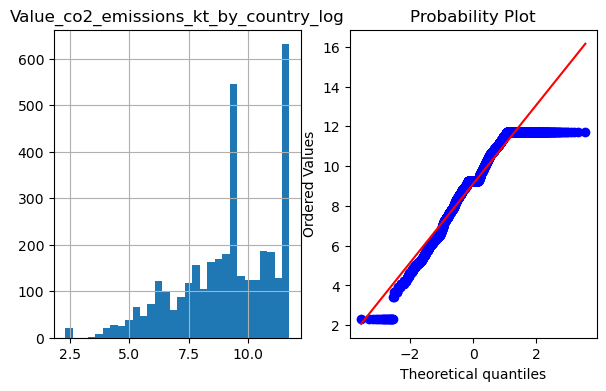

In [344]:
#Transformacion logaritmica

capped_df[col + '_log'] = np.log(capped_df[col])
plot_density_qq(capped_df, col + '_log')

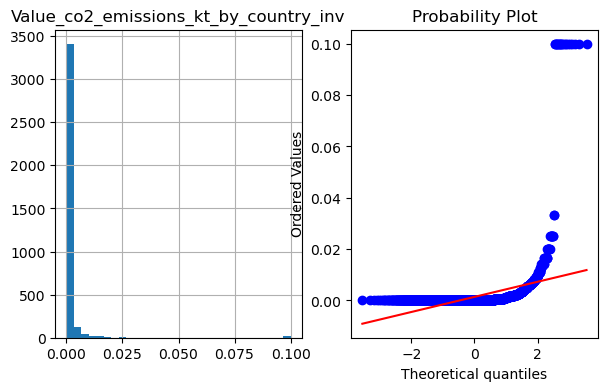

In [345]:
#Transformacion Inversa

capped_df[col + '_inv'] = 1/(capped_df[col])
plot_density_qq(capped_df, col + '_inv')

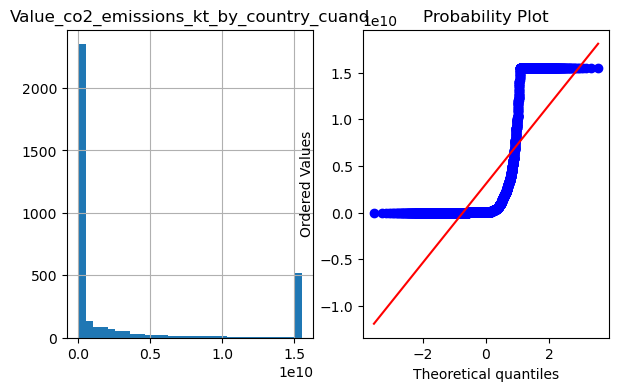

In [346]:
#Trasformacion Polinomial orden 2

capped_df[col + '_cuand'] = (capped_df[col])**2
plot_density_qq(capped_df, col + '_cuand')

0.1401


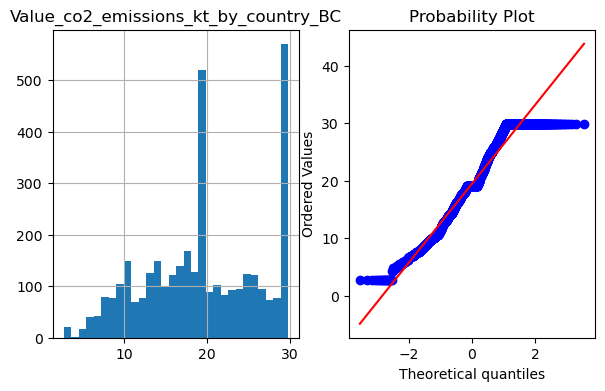

In [347]:
#Transformacion Box -Cox

capped_df[col + '_BC'], lmbd = stats.boxcox(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_BC')

0.1394


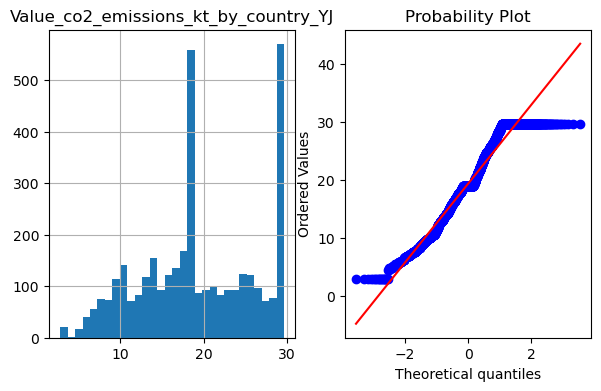

In [348]:
#Transformacion Yeo Johnson

capped_df[col + '_YJ'], lmbd = stats.yeojohnson(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_YJ')

#### 12. Para "Renewables (% equivalent primary energy)"

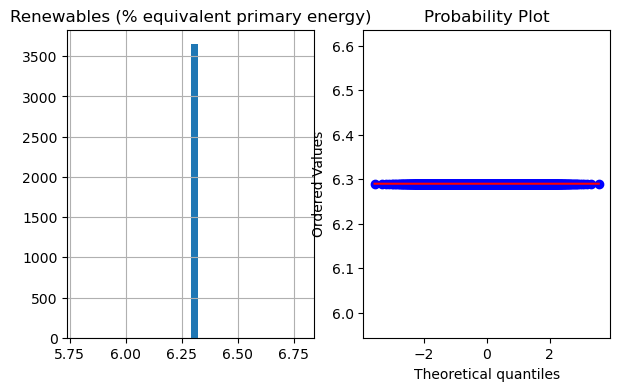

In [349]:
col = "Renewables (% equivalent primary energy)"
plot_density_qq(capped_df, col)

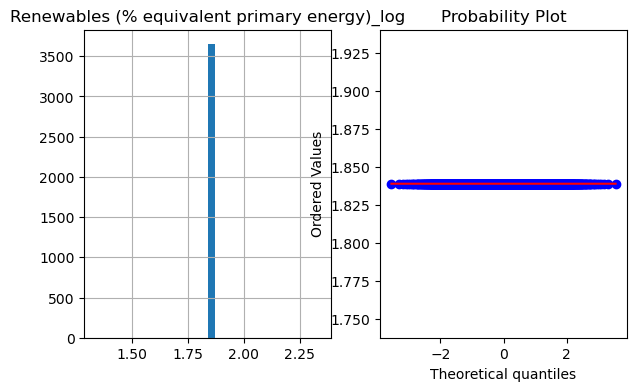

In [350]:
#Transformacion logaritmica

capped_df[col + '_log'] = np.log(capped_df[col])
plot_density_qq(capped_df, col + '_log')

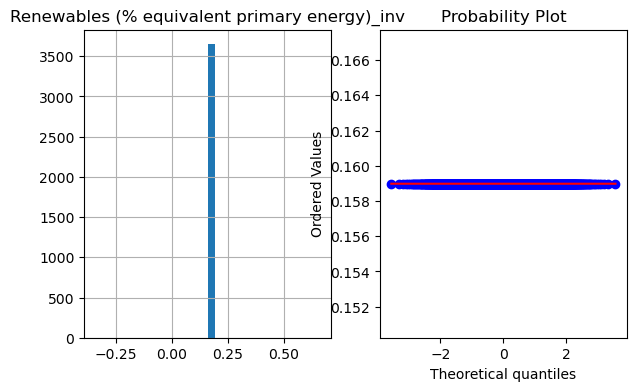

In [351]:
#Transformacion Inversa

capped_df[col + '_inv'] = 1/(capped_df[col])
plot_density_qq(capped_df, col + '_inv')

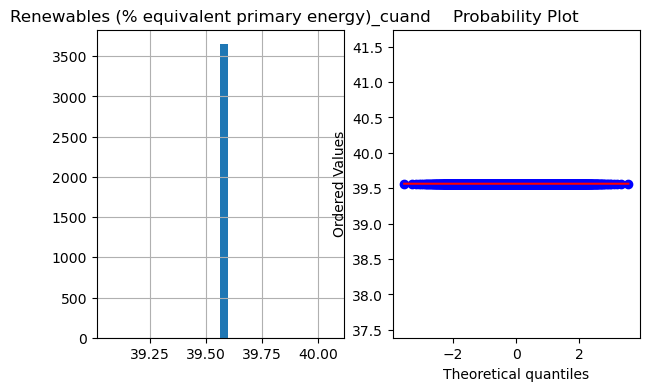

In [352]:
#Trasformacion Polinomial orden 2

capped_df[col + '_cuand'] = (capped_df[col])**2
plot_density_qq(capped_df, col + '_cuand')

4.5589


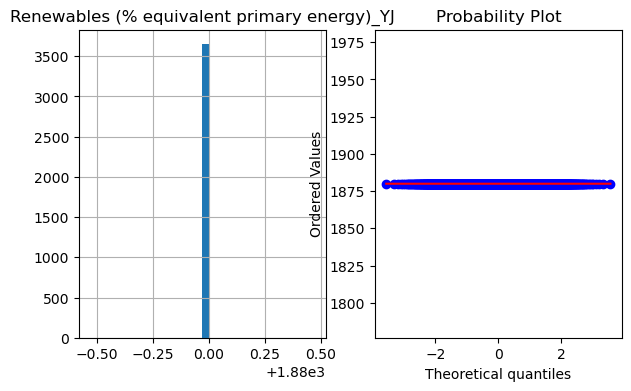

In [354]:
#Transformacion Yeo Johnson

capped_df[col + '_YJ'], lmbd = stats.yeojohnson(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_YJ')

#### 13. Para "gdp_growth"

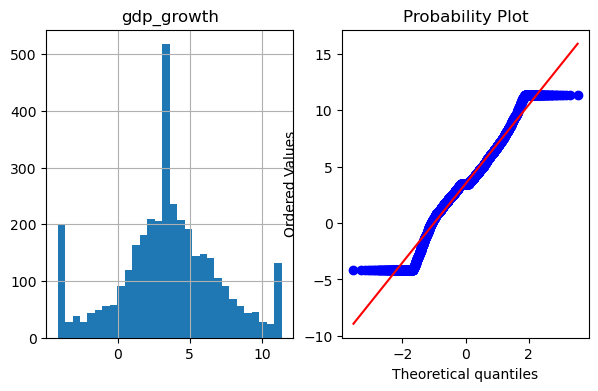

In [355]:
col = "gdp_growth"
plot_density_qq(capped_df, col)

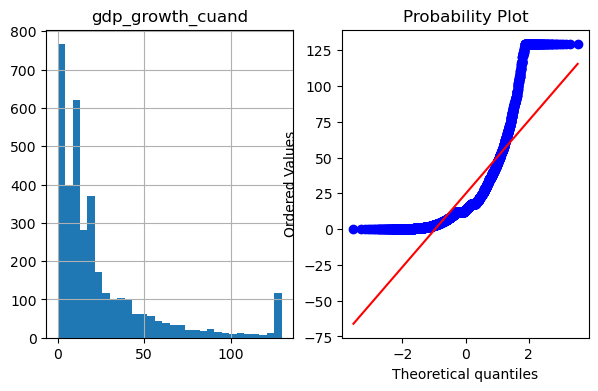

In [358]:
#Trasformacion Polinomial orden 2

capped_df[col + '_cuand'] = (capped_df[col])**2
plot_density_qq(capped_df, col + '_cuand')

1.0638


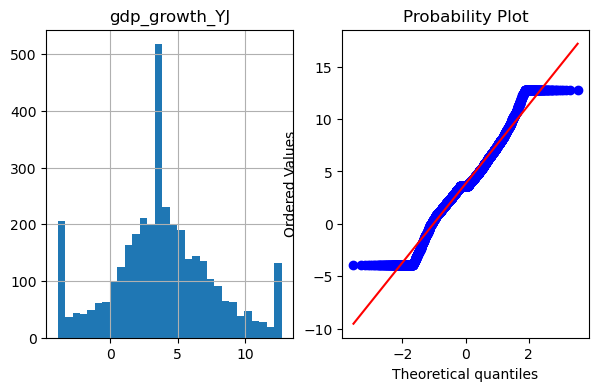

In [360]:
#Transformacion Yeo Johnson

capped_df[col + '_YJ'], lmbd = stats.yeojohnson(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_YJ')

#### 14. Para "gdp_per_capita"

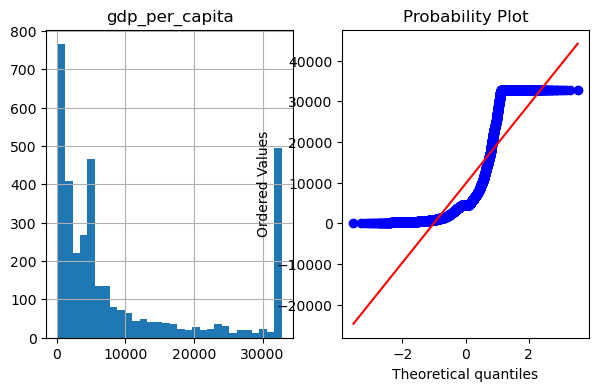

In [361]:
col = "gdp_per_capita"
plot_density_qq(capped_df, col)

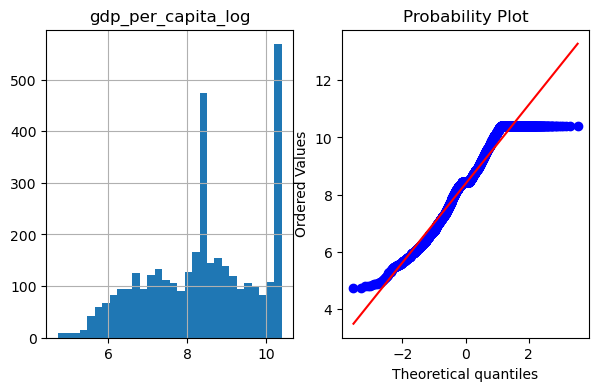

In [362]:
#Transformacion logaritmica

capped_df[col + '_log'] = np.log(capped_df[col])
plot_density_qq(capped_df, col + '_log')

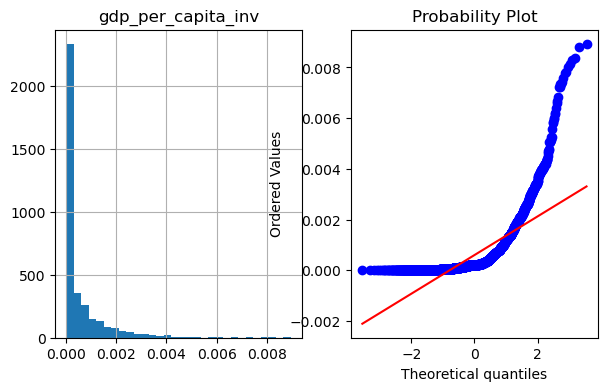

In [363]:
#Transformacion Inversa

capped_df[col + '_inv'] = 1/(capped_df[col])
plot_density_qq(capped_df, col + '_inv')

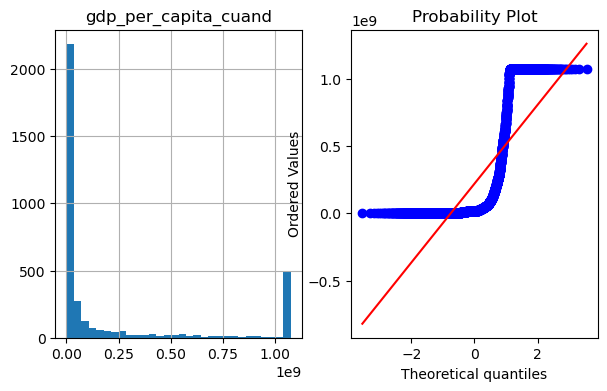

In [364]:
#Trasformacion Polinomial orden 2

capped_df[col + '_cuand'] = (capped_df[col])**2
plot_density_qq(capped_df, col + '_cuand')

0.0841


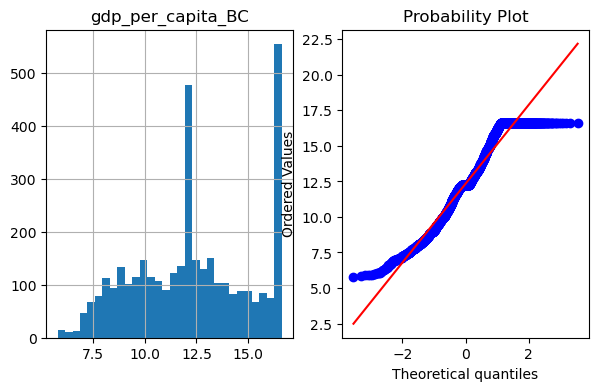

In [365]:
#Transformacion Box -Cox

capped_df[col + '_BC'], lmbd = stats.boxcox(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_BC')

0.0838


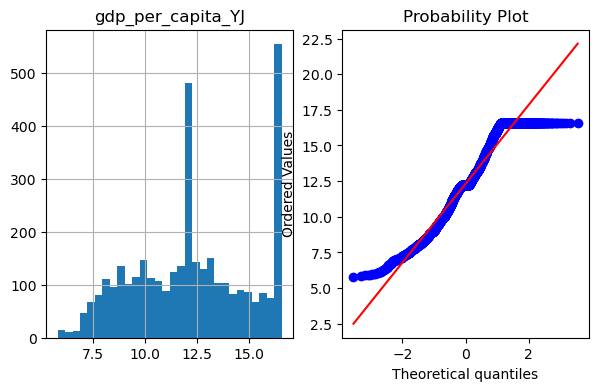

In [366]:
#Transformacion Yeo Johnson

capped_df[col + '_YJ'], lmbd = stats.yeojohnson(capped_df[col])
lmbd = round(lmbd,4)
print(lmbd)
plot_density_qq(capped_df, col + '_YJ')

#### 5. Finalmente una vez aplicadas todas las transformaciones descritas anteriormente, deberá aplicar el escalado de variables a todo el dataset. Recuerde que puede aplicar los siguientes tipos de feature scaling.

In [367]:
dataset_proy.describe()

Year  Access to electricity (% of population)  \
count  3648.000000                              3648.000000   
mean   2010.041118                                78.933693   
std       6.052776                                30.238162   
min    2000.000000                                 1.252269   
25%    2005.000000                                59.916941   
50%    2010.000000                                98.272340   
75%    2015.000000                               100.000000   
max    2020.000000                               100.000000   

       Access to clean fuels for cooking  \
count                        3648.000000   
mean                           63.255504   
std                            38.133777   
min                             0.000000   
25%                            25.862500   
50%                            78.875000   
75%                           100.000000   
max                           100.000000   

       Renewable-electricity-generating-capacity-per-capita  \
count                                        3648.000000      
mean                                           92.493616      
std                                           213.395777      
min                                             0.000000      
25%                                             8.380000      
50%                                            32.880000      
75%                                            67.472500      
max                                          3060.190000      

       Financial flows to developing countries (US $)  \
count                                    3.648000e+03   
mean                                     4.353562e+07   
std                                      1.998022e+08   
min                                      0.000000e+00   
25%                                      5.665000e+06   
50%                                      5.665000e+06   
75%                                      5.665000e+06   
max                                      5.202310e+09   

       Renewable energy share in the total final energy consumption (%)  \
count                                        3648.000000                  
mean                                           32.142379                  
std                                            29.168672                  
min                                             0.000000                  
25%                                             7.095000                  
50%                                            23.270000                  
75%                                            52.612500                  
max                                            96.040000                  

       Electricity from fossil fuels (TWh)  Electricity from nuclear (TWh)  \
count                          3648.000000                     3648.000000   
mean                             69.996209                       12.989315   
std                             347.131749                       71.786293   
min                               0.000000                        0.000000   
25%                               0.300000                        0.000000   
50%                               2.970000                        0.000000   
75%                              26.527500                        0.000000   
max                            5184.130000                      809.410000   

       Electricity from renewables (TWh)  \
count                        3648.000000   
mean                           23.845069   
std                           104.157507   
min                             0.000000   
25%                             0.050000   
50%                             1.470000   
75%                             9.560000   
max                          2184.940000   

       Low-carbon electricity (% electricity)  \
count                             3648.000000   
mean                                36.708904   
std                                 34.12922

In [368]:
#Creamos la funcion para evalucaion de las escala de nuestro dataFrame 

def min_max_scale(df):
    scaled_df = pd.DataFrame()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            min_val = df[col].min()
            max_val = df[col].max()
            scaled_df[col + '_minMaxScaled'] = (df[col] - min_val) / (max_val - min_val)
        else:
           scaled_df[col] = df[col]
    return scaled_df
df_continuas = pd.read_csv("fase_1_proy.csv")

In [369]:
scaled_df = min_max_scale(df_continuas)

# Mostrar las primeras filas del DataFrame escalado
scaled_df.head()

Entity  Year_minMaxScaled  \
0  Afghanistan               0.00   
1  Afghanistan               0.05   
2  Afghanistan               0.10   
3  Afghanistan               0.15   
4  Afghanistan               0.20   

   Access to electricity (% of population)_minMaxScaled  \
0                                           0.003659      
1                                           0.028581      
2                                           0.082603      
3                                           0.136573      
4                                           0.190513      

   Access to clean fuels for cooking_minMaxScaled  \
0                                           0.062   
1                                           0.072   
2                                           0.082   
3                                           0.095   
4                                           0.109   

   Renewable-electricity-generating-capacity-per-capita_minMaxScaled  \
0                                           0.003013                   
1                                           0.002895                   
2                                           0.002768                   
3                                           0.002644                   
4                                           0.002533                   

   Financial flows to developing countries (US $)_minMaxScaled  \
0                                           0.000004             
1                                           0.000025             
2                                           0.000759             
3                                           0.004992             
4                                           0.001089             

   Renewable energy share in the total final energy consumption (%)_minMaxScaled  \
0                                           0.468451                               
1                                           0.474802                               
2                                           0.393898                               
3                                           0.381716                               
4                                           0.460641                               

   Electricity from fossil fuels (TWh)_minMaxScaled  \
0                                          0.000031   
1                                          0.000017   
2                                          0.000025   
3                                          0.000060   
4                                          0.000064   

   Electricity from nuclear (TWh)_minMaxScaled  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   

   Electricity from renewables (TWh)_minMaxScaled  ...  \
0                                        0.000142  ...   
1                                        0.000229  ...   
2                                        0.000256  ...   
3                                        0.000288  ...   
4                                        0.000256  ...   

   Primary energy consumption per capita (kWh/person)_minMaxScaled  \
0                                           0.001152                 
1                                           0.000902                 
2                                           0.000803                 
3                                           0.000876                 
4                                           0.000778                 

   Energy intensity level of primary energy (MJ/$2017 PPP GDP)_minMaxScaled  \
0                                           0.047135                          
1                                           0.050216                          
2                                           0.039741                          
3                                           0.039741      